In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, IsolationForest, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report, roc_curve ,roc_auc_score, average_precision_score, precision_recall_curve, auc,f1_score, precision_score, recall_score, confusion_matrix, brier_score_loss  
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek


In [2]:
df = pd.read_csv('data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Exploration (EDA)

In [3]:
df.shape


(284807, 31)

In [4]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
df.duplicated().sum()

1081

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df["Class"].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

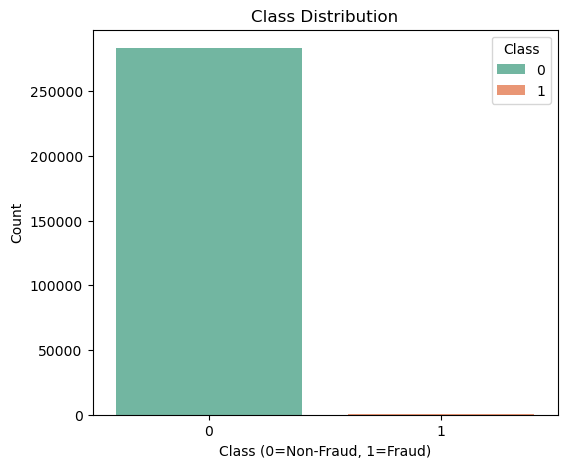

Fraud Percentage: 0.1667%


In [14]:
plt.figure(figsize=(6,5))
sns.countplot(x="Class", data=df, palette="Set2",hue="Class")
plt.title("Class Distribution")
plt.xlabel("Class (0=Non-Fraud, 1=Fraud)")
plt.ylabel("Count")
plt.show()

fraud_percentage = df["Class"].mean() * 100
print(f"Fraud Percentage: {fraud_percentage:.4f}%")

## Feature engineering

In [15]:

df['Hour_from_start_mod24'] = ((df['Time'] // 3600) % 24).astype(int) #number of hours from start in 24 hour mode
df['is_night_proxy'] = df['Hour_from_start_mod24'].isin([22,23,0,1,2,3,4,5]).astype(int) # is night proxy (night 1 ,day 0)
df['is_business_hours_proxy'] = df['Hour_from_start_mod24'].between(9,17).astype(int) # is in business hours proxy 

df['_log_amount'] = np.log1p(df['Amount']) # log amount to handle very high values or very low values of amount


features = [c for c in df.columns if c.startswith("V")] + [
    'Amount','_log_amount',
    'Hour_from_start_mod24','is_night_proxy','is_business_hours_proxy'
]
target = "Class"

/tmp/ipykernel_2163644/470930003.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_part  = df.groupby("DayPart")["Class"].mean().reindex(labels)


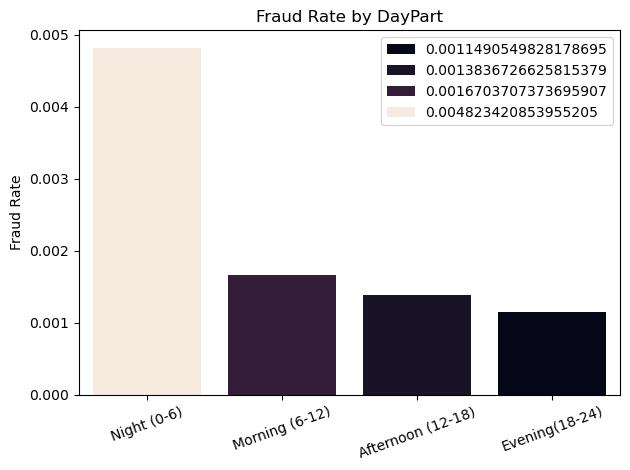

In [16]:
bins   = [0,6,12,18,24]
labels = ["Night (0-6)", "Morning (6-12)", "Afternoon (12-18)", "Evening(18-24)"]

df["DayPart"] = pd.cut(df["Hour_from_start_mod24"], bins=bins, labels=labels, right=False, include_lowest=True)


fraud_by_part  = df.groupby("DayPart")["Class"].mean().reindex(labels)

sns.barplot(x=fraud_by_part.index, y=fraud_by_part.values, palette="rocket",hue=fraud_by_part.values)
plt.xticks(rotation=20)
plt.title("Fraud Rate by DayPart")
plt.xlabel("")
plt.ylabel("Fraud Rate")
plt.tight_layout()
plt.show()

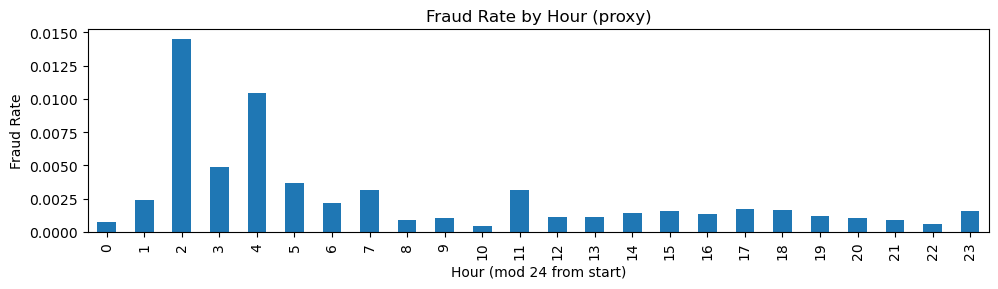

In [17]:
hour_rate = df.groupby("Hour_from_start_mod24")["Class"].mean().reindex(range(24)).fillna(0)
hour_rate.plot(kind="bar", figsize=(10,3), title="Fraud Rate by Hour (proxy)")
plt.xlabel("Hour (mod 24 from start)"); plt.ylabel("Fraud Rate")
plt.tight_layout(); plt.show()

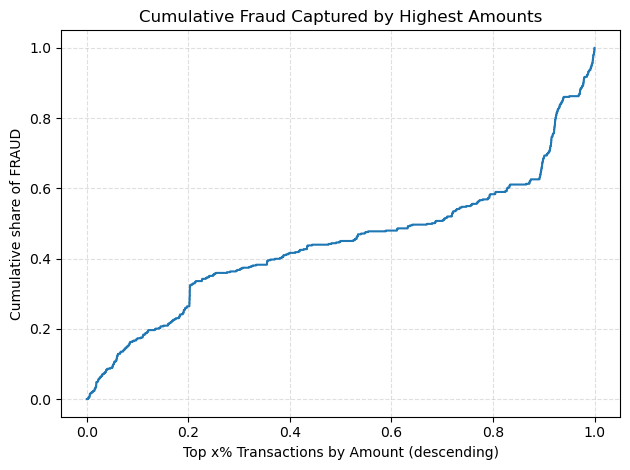

In [18]:
#Cumulative share of fraud by Amount rank
tmp = df[["Amount","Class"]].sort_values("Amount", ascending=False).reset_index(drop=True)
tmp["cum_tx"] = np.arange(1, len(tmp)+1) / len(tmp)
tmp["cum_fraud"] = tmp["Class"].cumsum() / tmp["Class"].sum()

plt.plot(tmp["cum_tx"], tmp["cum_fraud"])
plt.xlabel("Top x% Transactions by Amount (descending)")
plt.ylabel("Cumulative share of FRAUD")
plt.title("Cumulative Fraud Captured by Highest Amounts")
plt.grid(True, ls="--", alpha=0.4)
plt.tight_layout()
plt.show()

In [19]:
df.dtypes

Time                        float64
V1                          float64
V2                          float64
V3                          float64
V4                          float64
V5                          float64
V6                          float64
V7                          float64
V8                          float64
V9                          float64
V10                         float64
V11                         float64
V12                         float64
V13                         float64
V14                         float64
V15                         float64
V16                         float64
V17                         float64
V18                         float64
V19                         float64
V20                         float64
V21                         float64
V22                         float64
V23                         float64
V24                         float64
V25                         float64
V26                         float64
V27                         

## Check Outlier

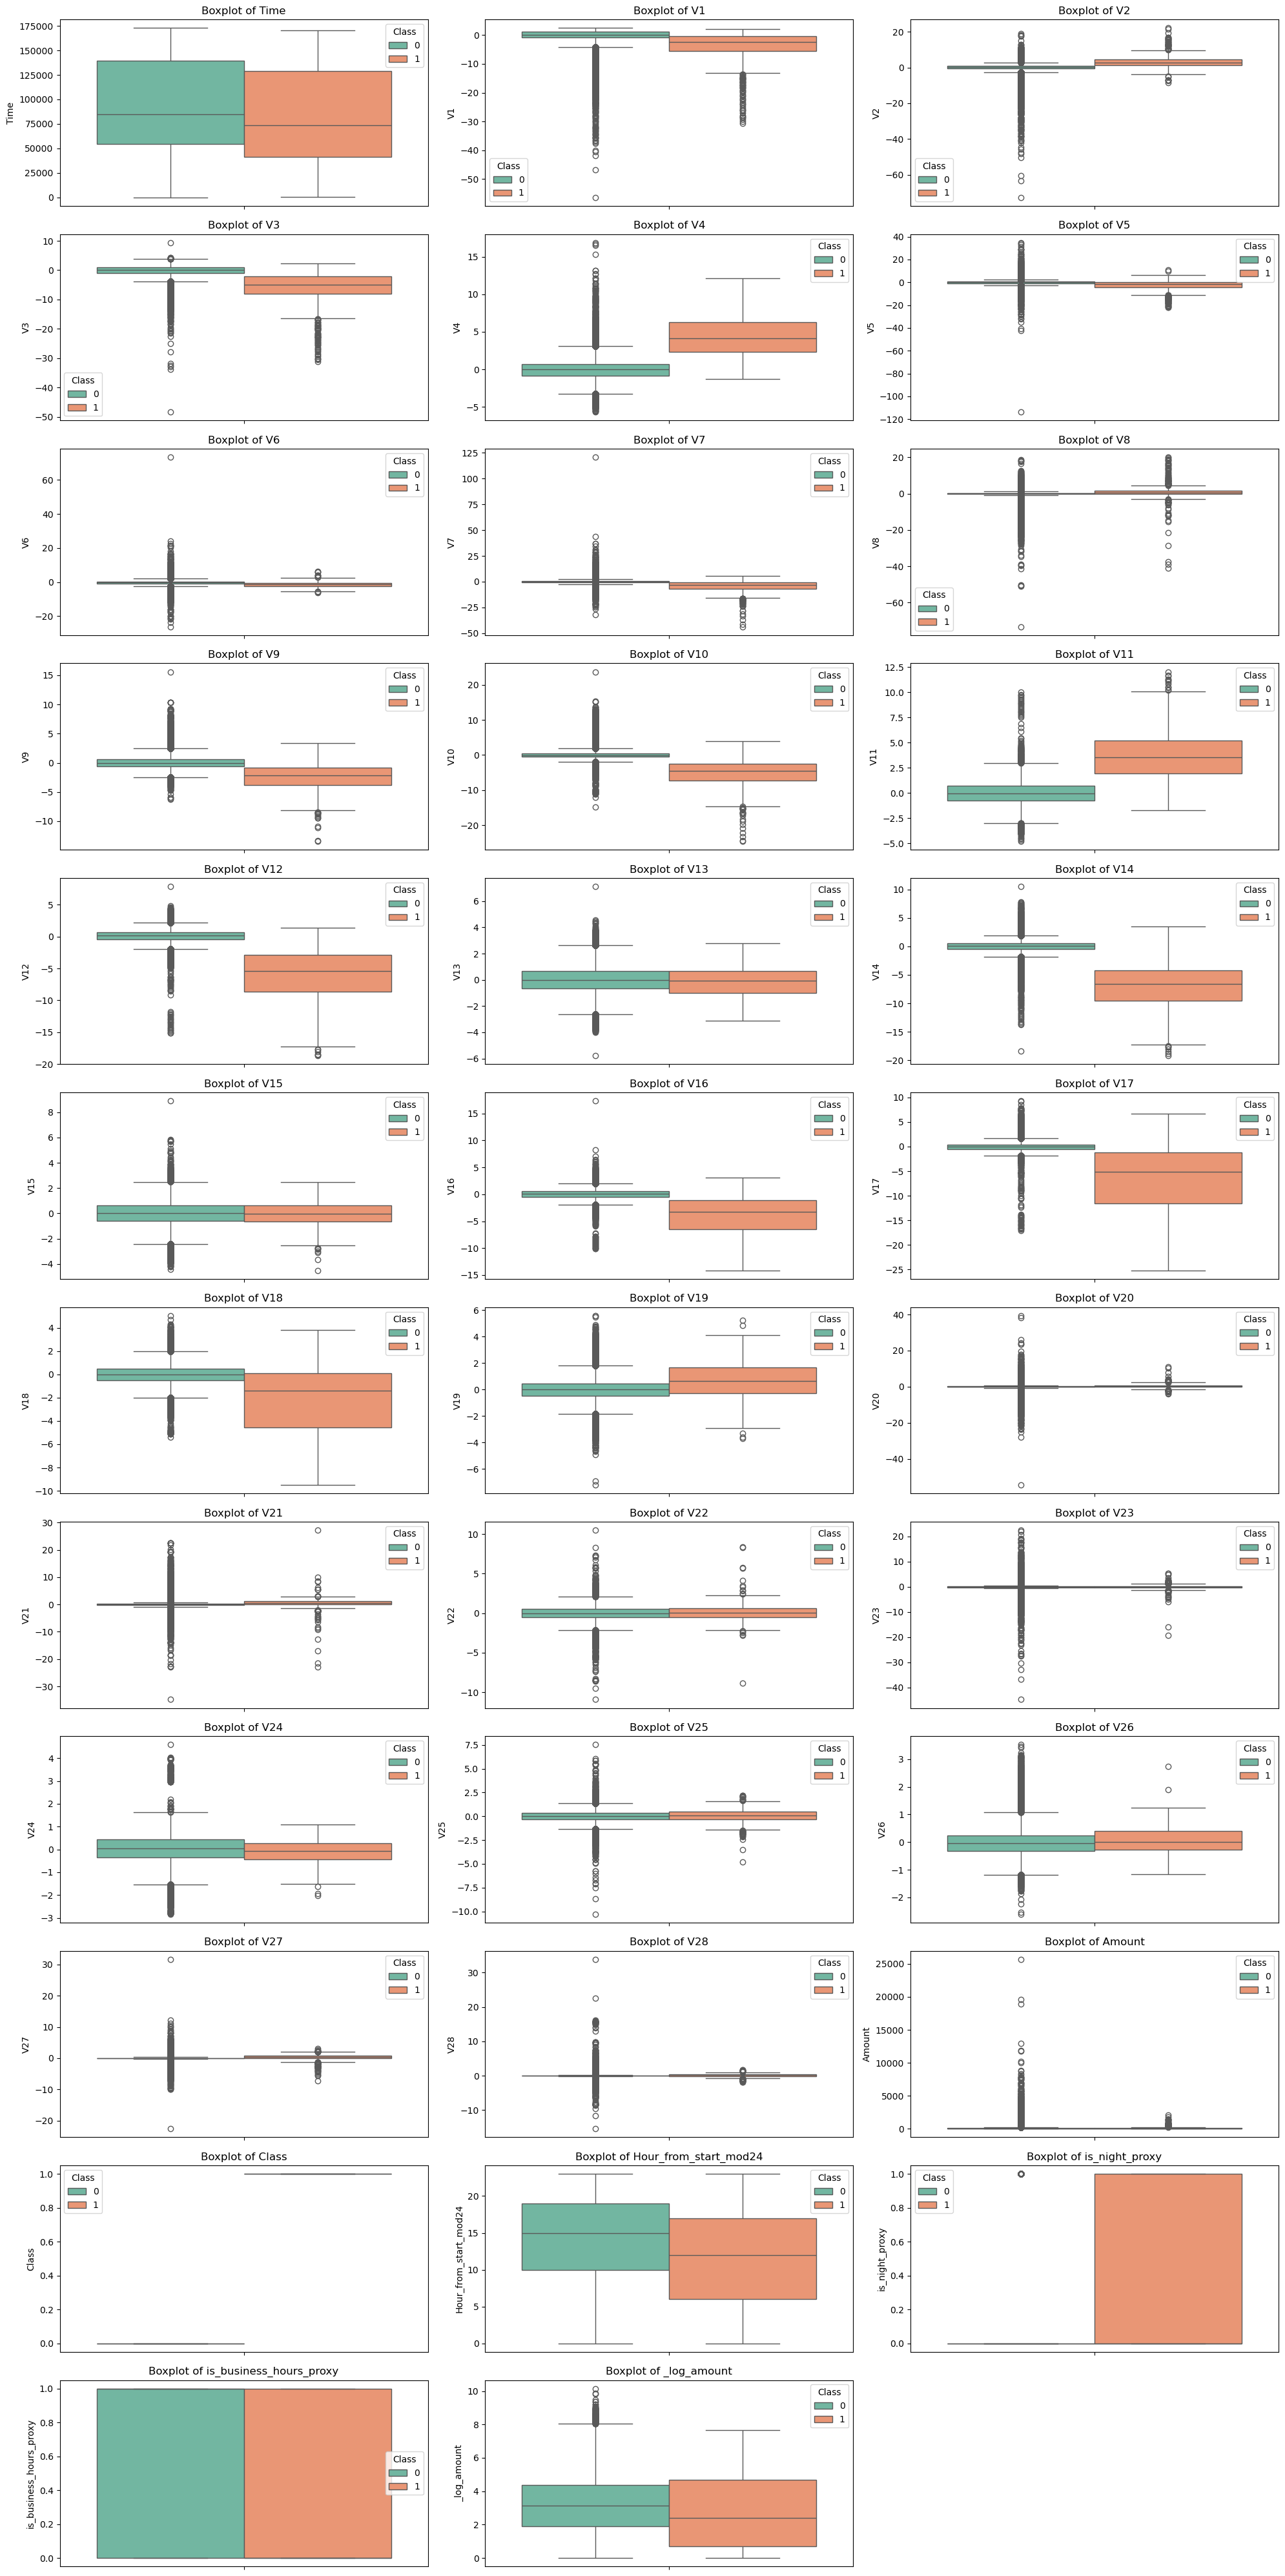

In [20]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 40))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)  
    sns.boxplot(data=df, y=col, palette="Set2",hue="Class")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

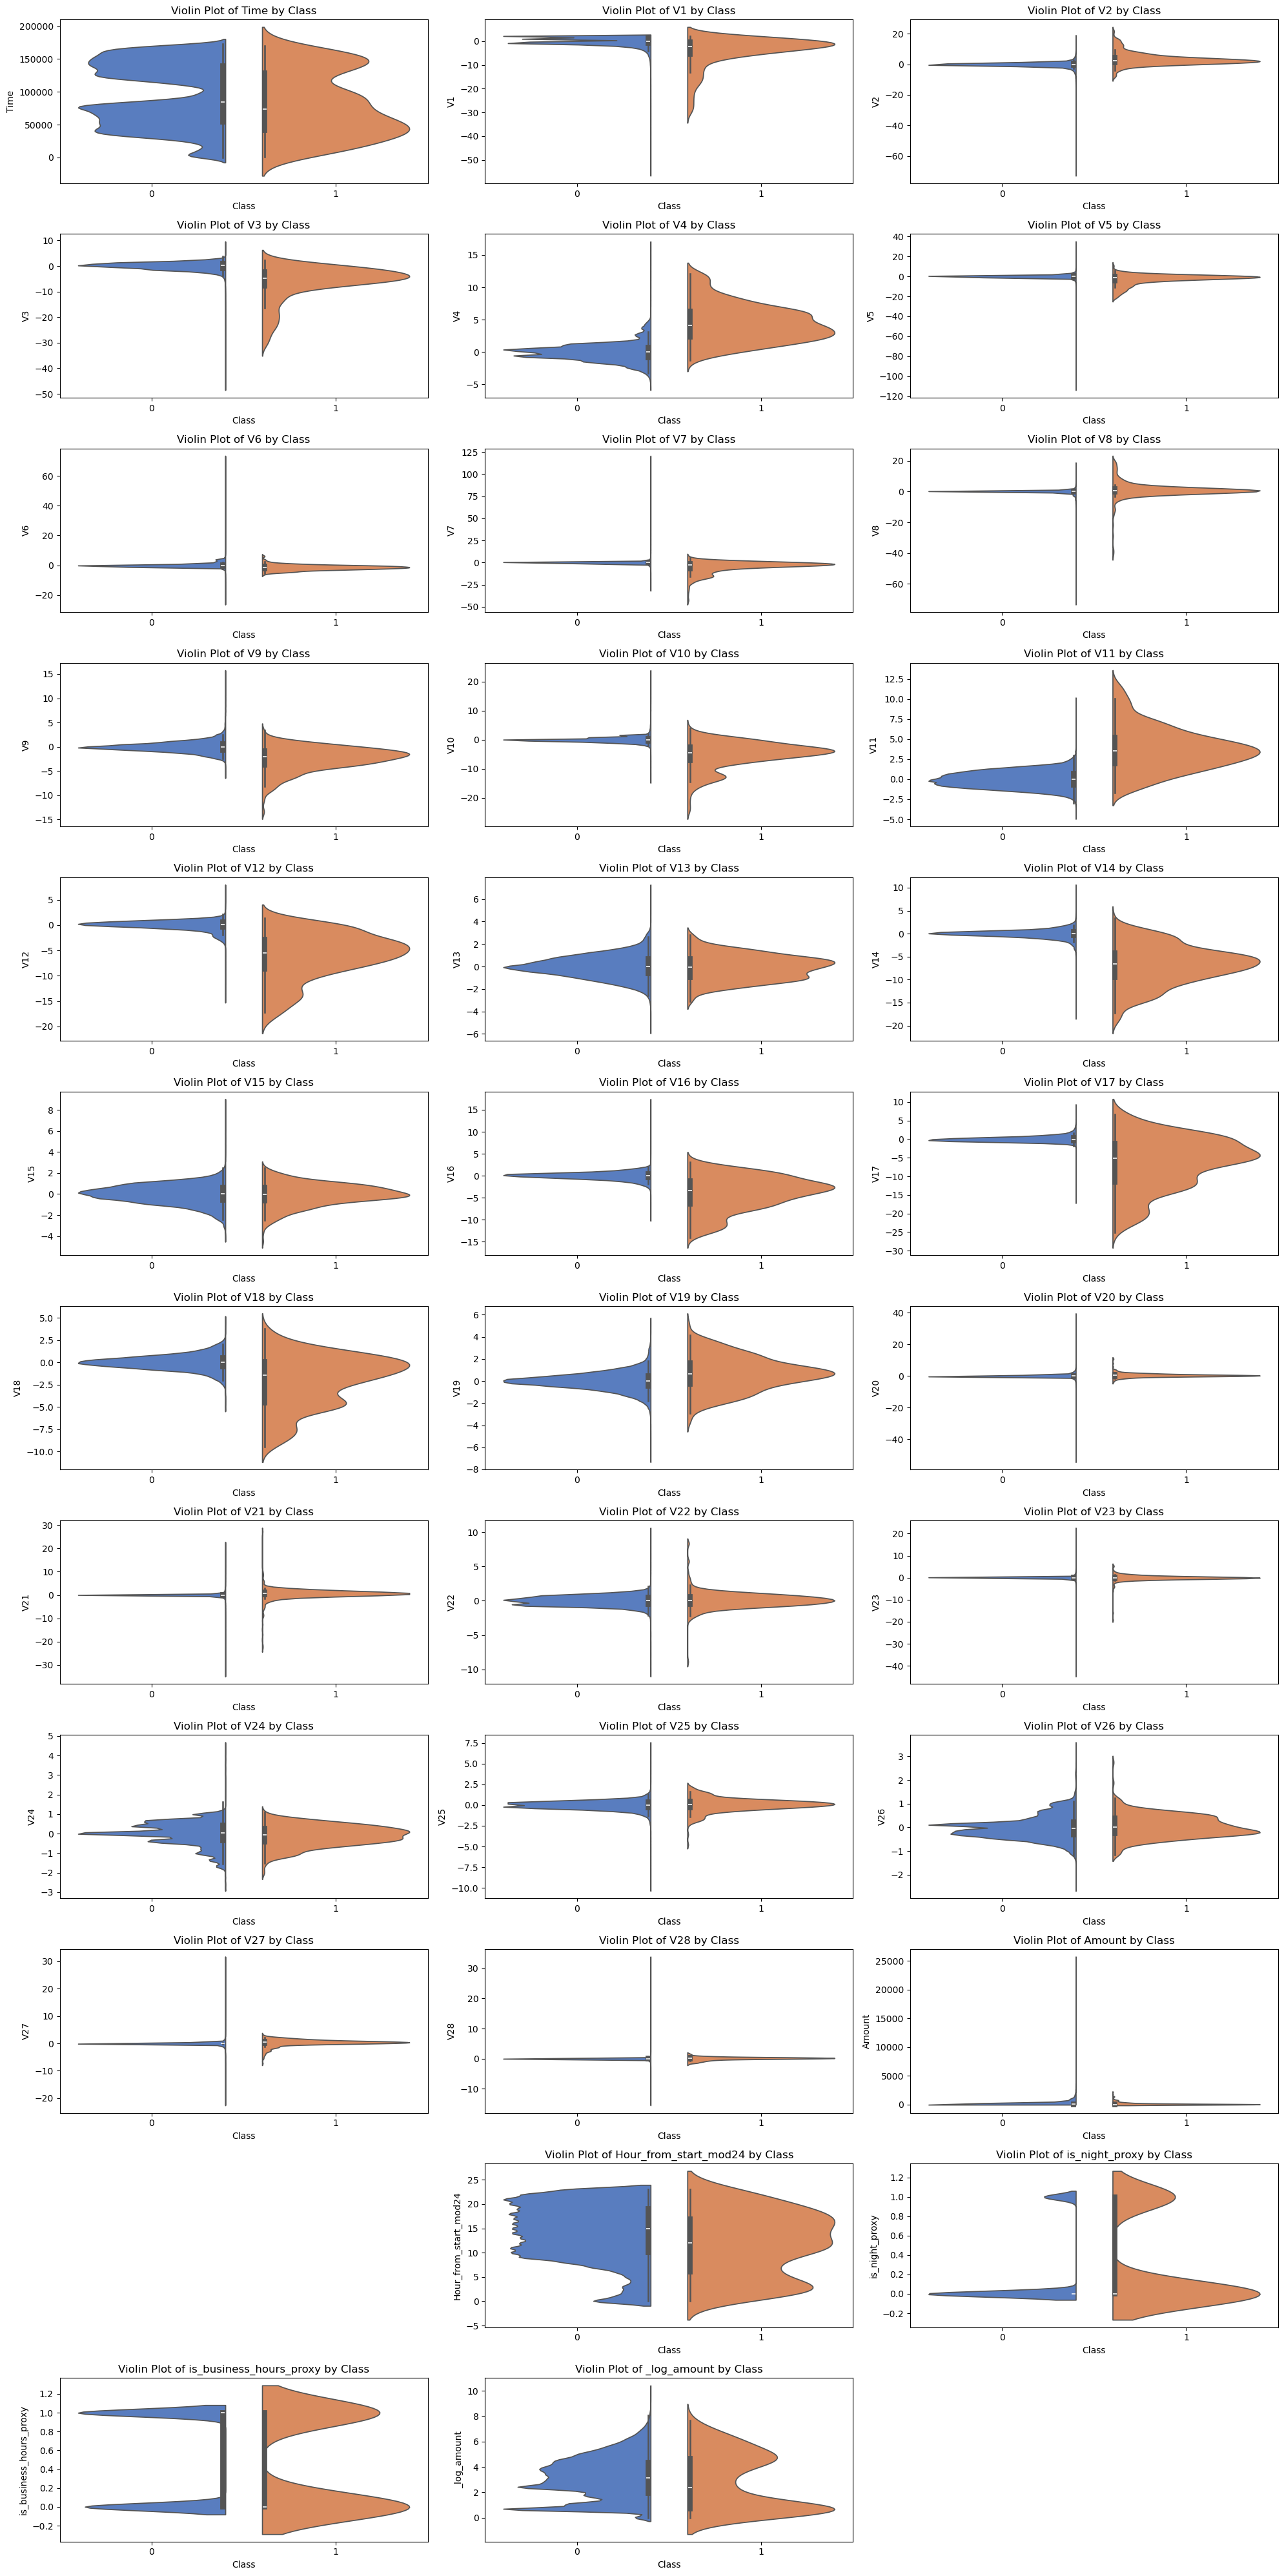

In [21]:
plt.figure(figsize=(20, 40))

for i, col in enumerate(numeric_cols, 1):
    if col != "Class":
        plt.subplot(len(numeric_cols)//3 + 1, 3, i)
        sns.violinplot(data=df, x="Class", y=col, palette="muted", split=True,hue="Class",legend=False)
        plt.title(f"Violin Plot of {col} by Class")

plt.tight_layout()
plt.show()

## Data Analysis

In [22]:
df.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Hour_from_start_mod24', 'is_night_proxy',
       'is_business_hours_proxy', '_log_amount', 'DayPart'],
      dtype='object')

In [23]:
df["Time"].describe()


count    283726.000000
mean      94811.077600
std       47481.047891
min           0.000000
25%       54204.750000
50%       84692.500000
75%      139298.000000
max      172792.000000
Name: Time, dtype: float64

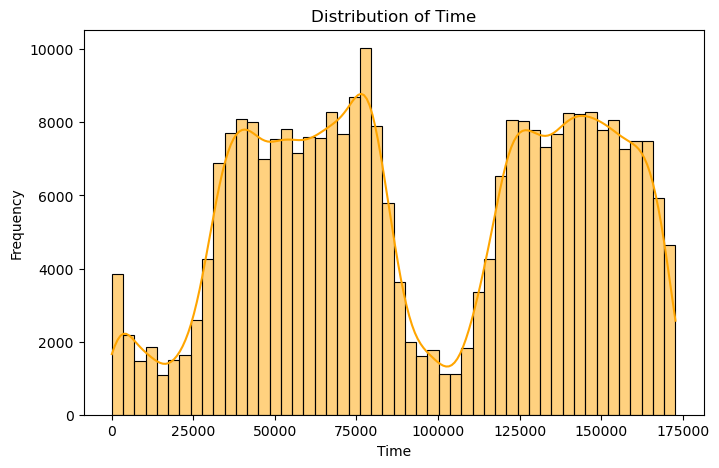

In [24]:
plt.figure(figsize=(8,5))
sns.histplot(df["Time"], bins=50, kde=True, color="orange")
plt.title("Distribution of Time")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

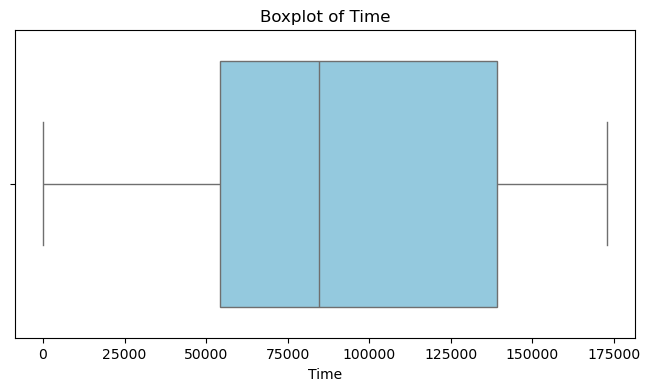

In [25]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df["Time"], color="skyblue")
plt.title("Boxplot of Time")
plt.xlabel("Time")
plt.show()

In [26]:
def analyze_feature(df, column):
    
    fig, axes = plt.subplots(1, 3, figsize=(18,5))
    sns.histplot(df[column], bins=50, kde=True, ax=axes[0], color="orange")
    axes[0].set_title(f"Distribution of {column}")
    
    # Boxplot
    sns.boxplot(x=df[column], ax=axes[1], color="skyblue")
    axes[1].set_title(f"Boxplot of {column}")
    
    # Violinplot
    sns.violinplot(x=df[column], ax=axes[2], color="lightgreen")
    axes[2].set_title(f"Violin Plot of {column}")
    
    plt.tight_layout()
    plt.show()


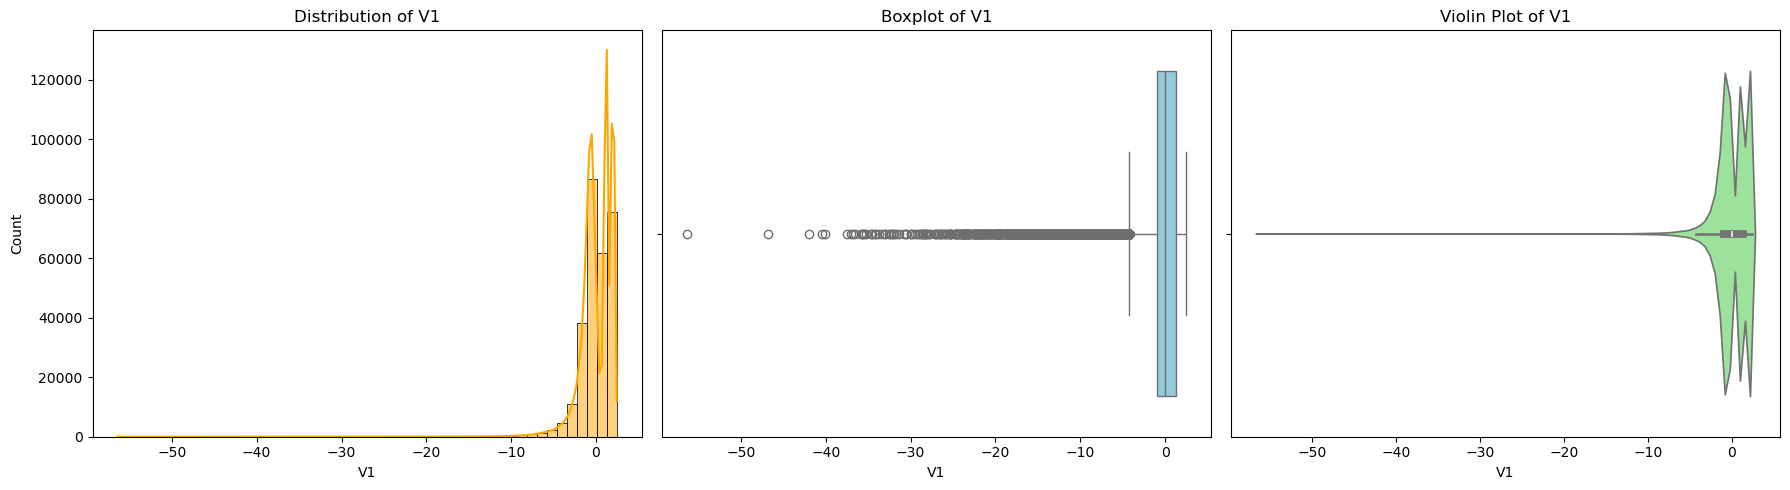

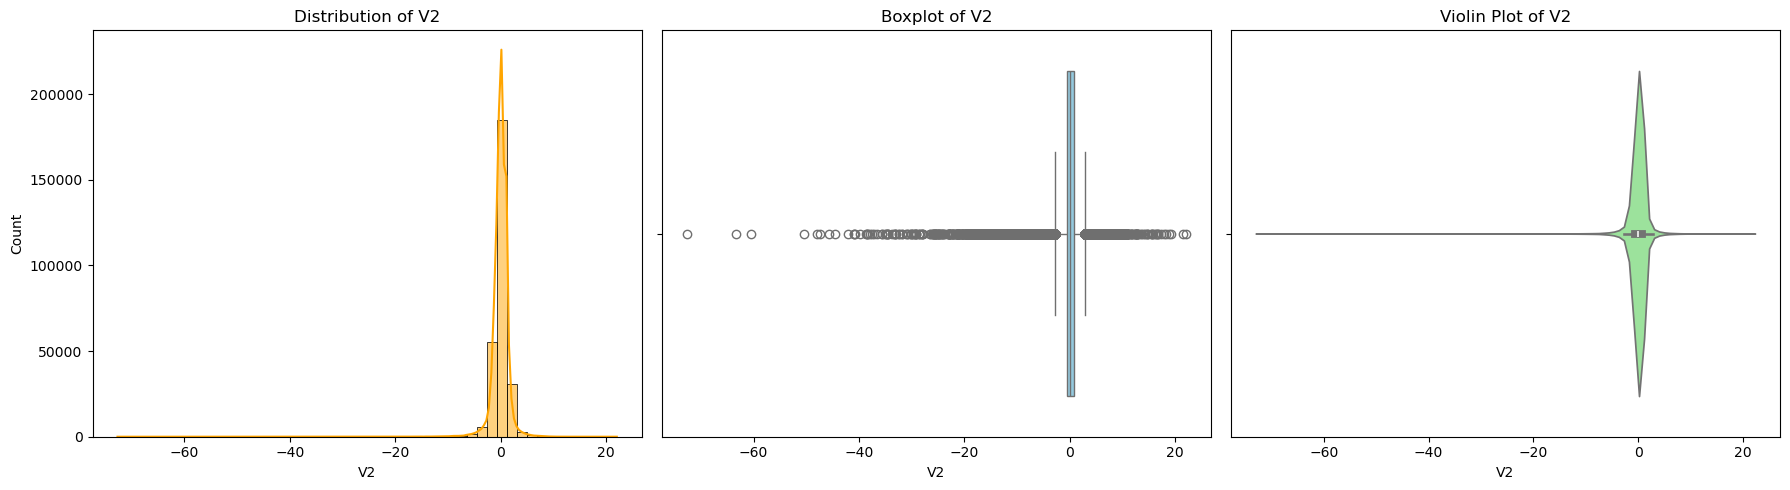

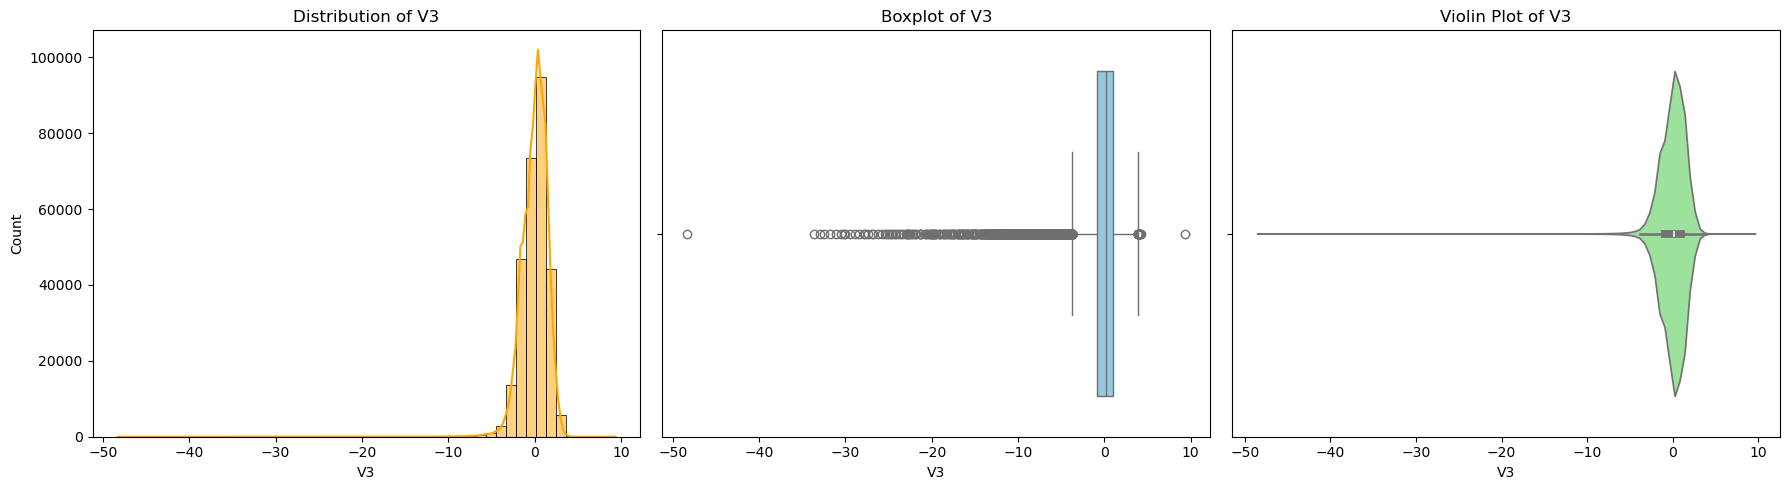

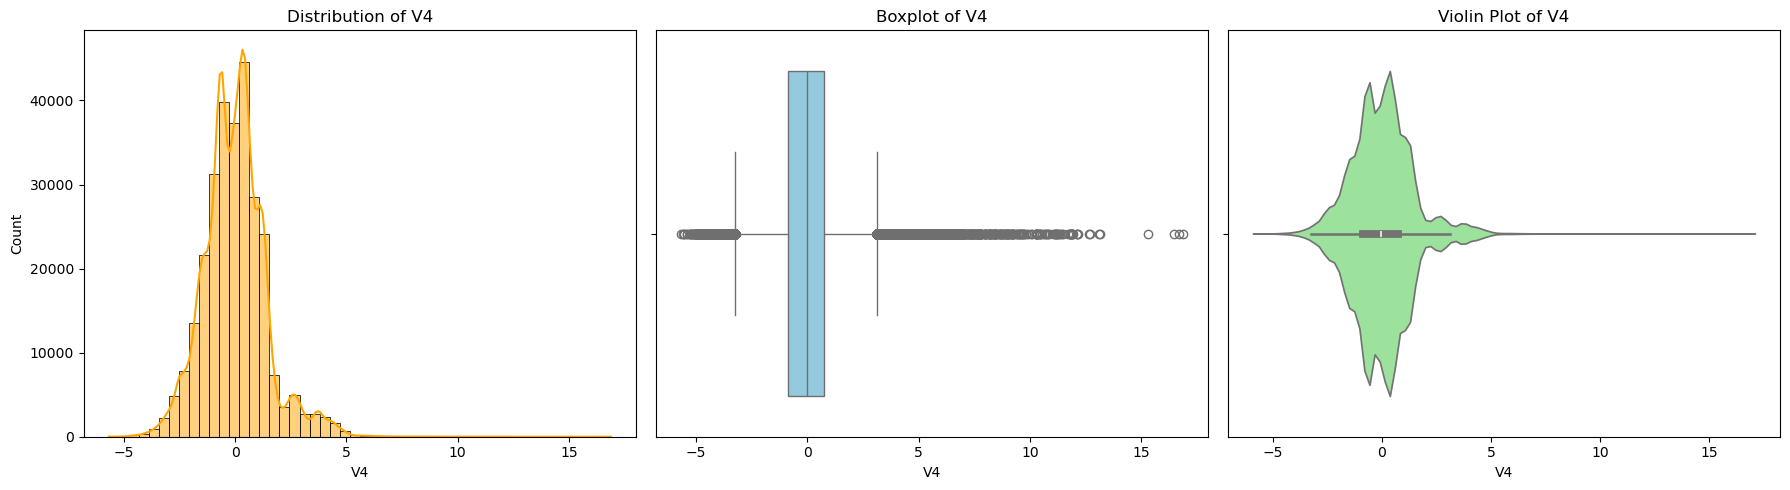

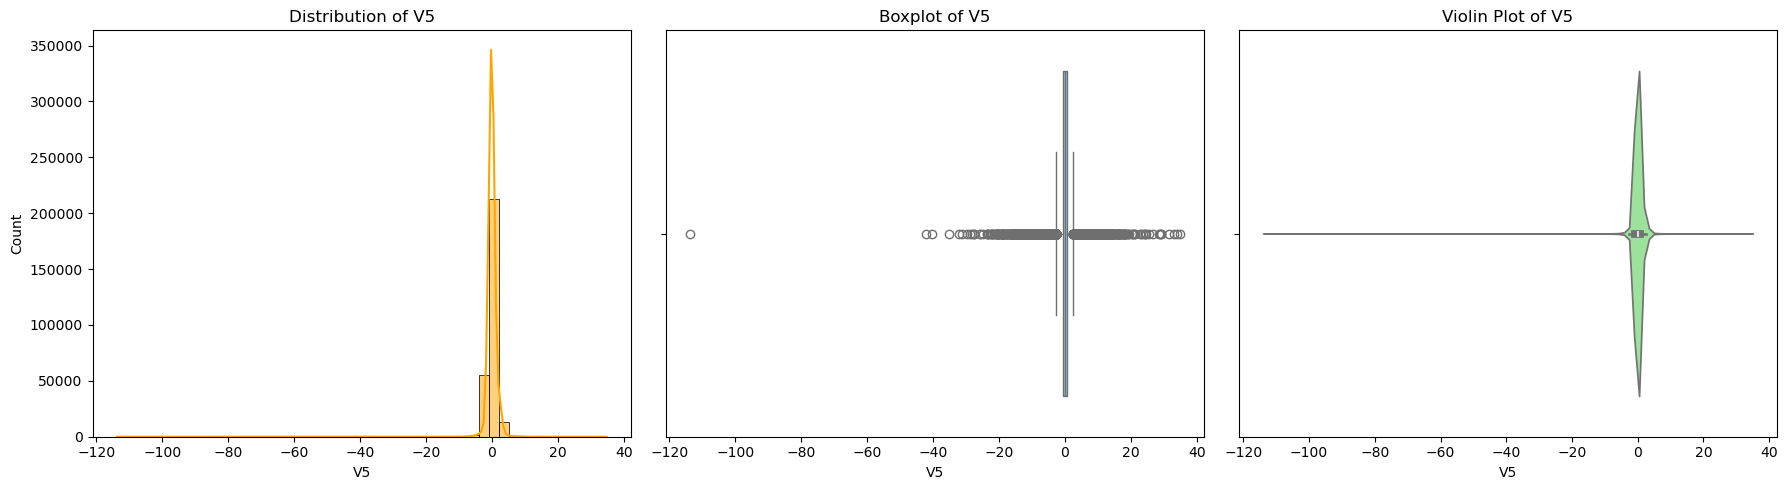

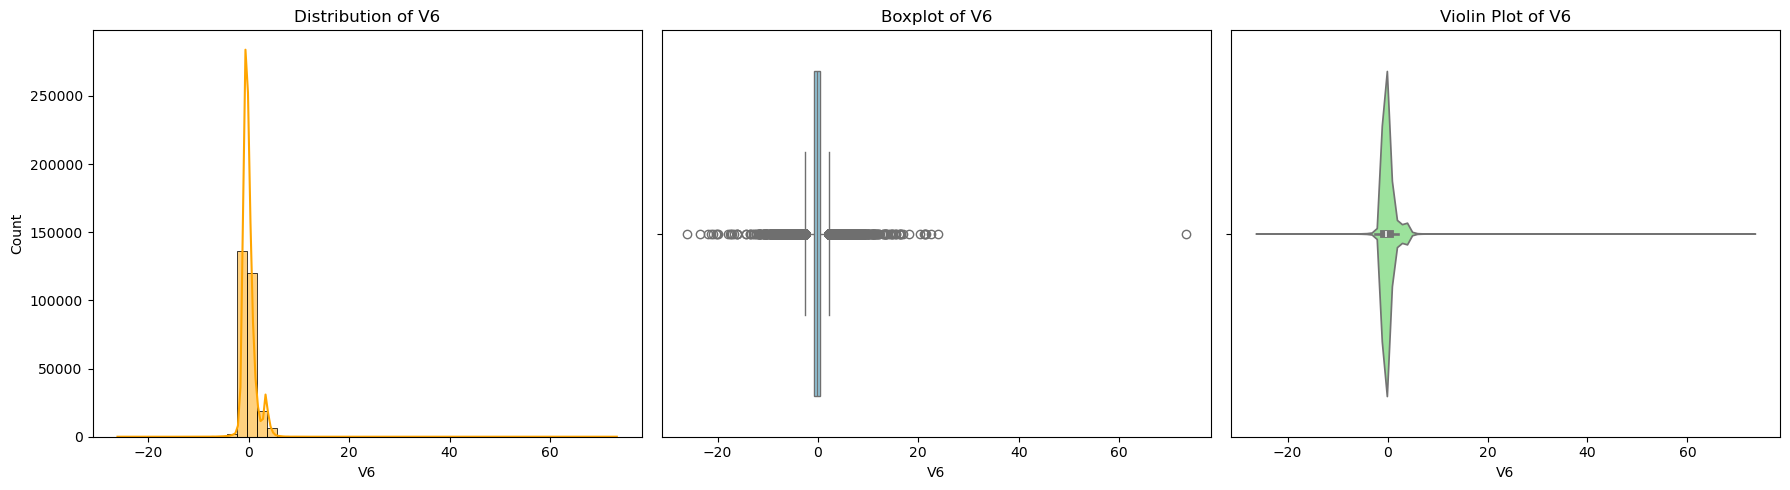

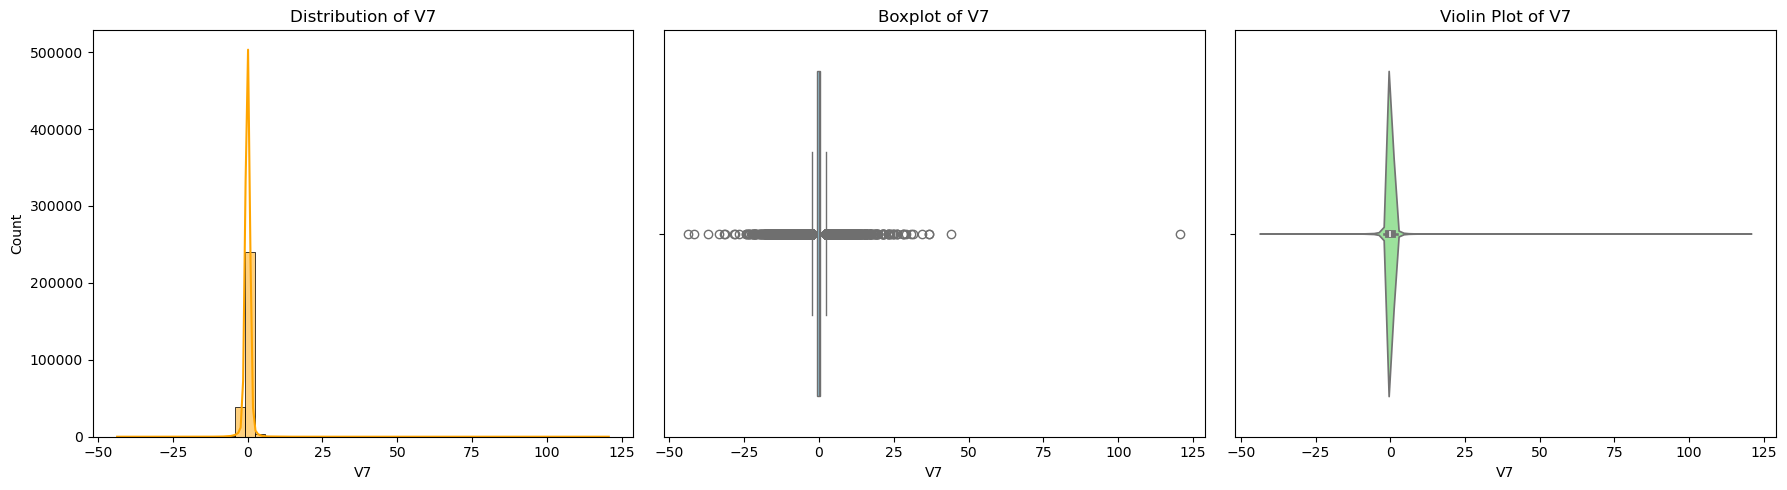

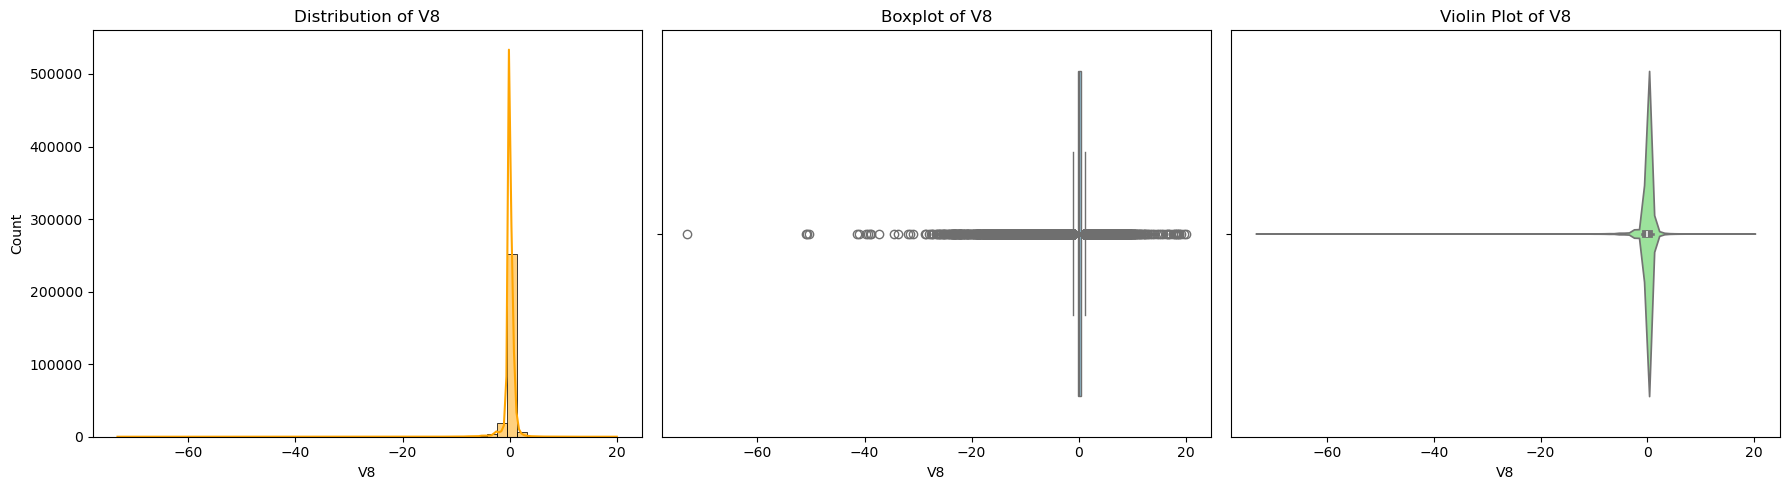

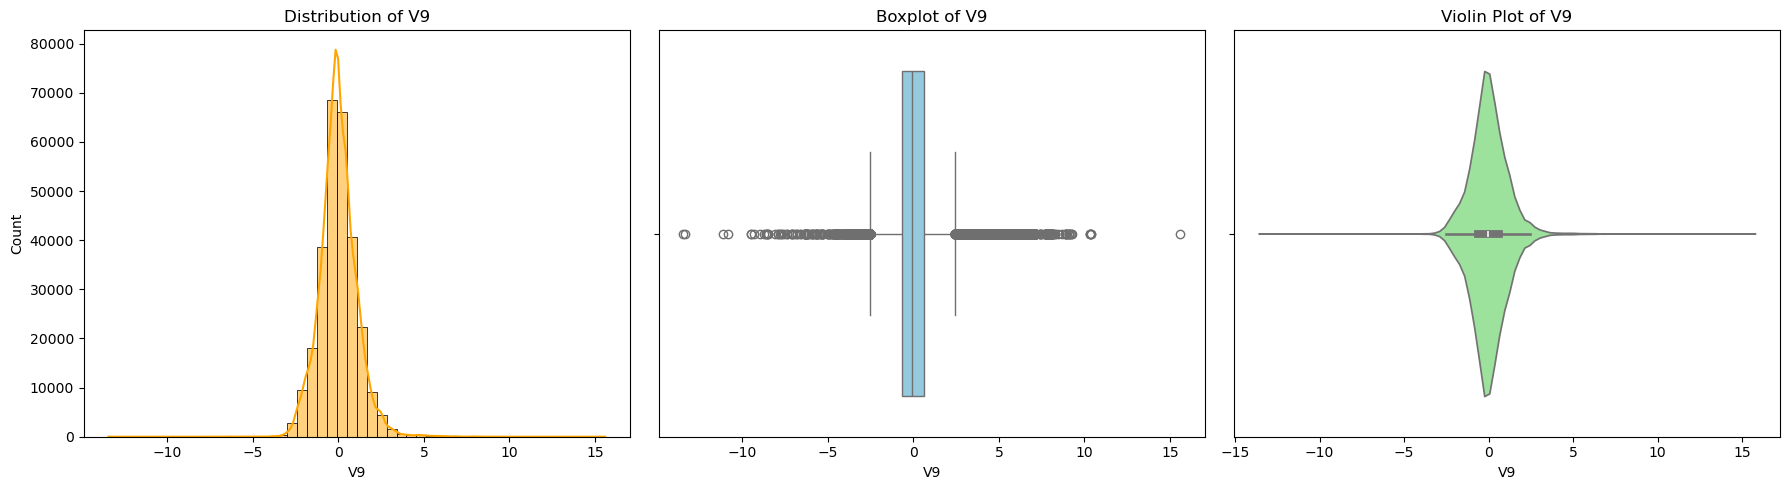

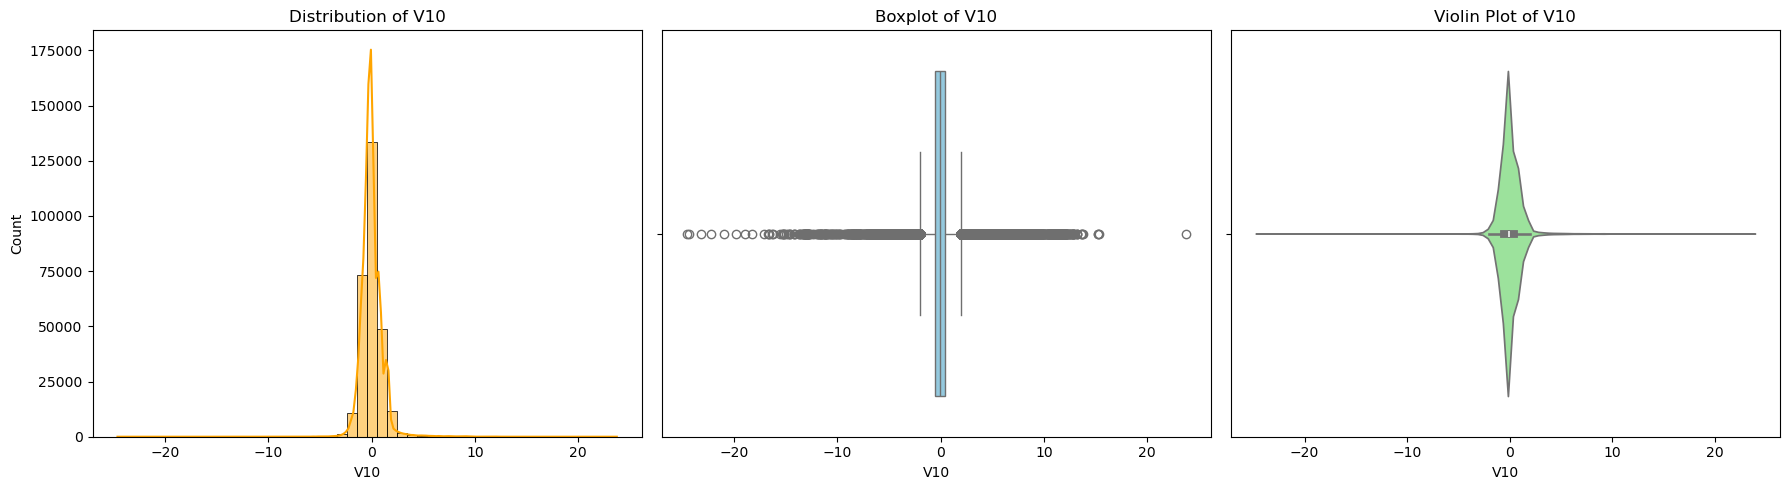

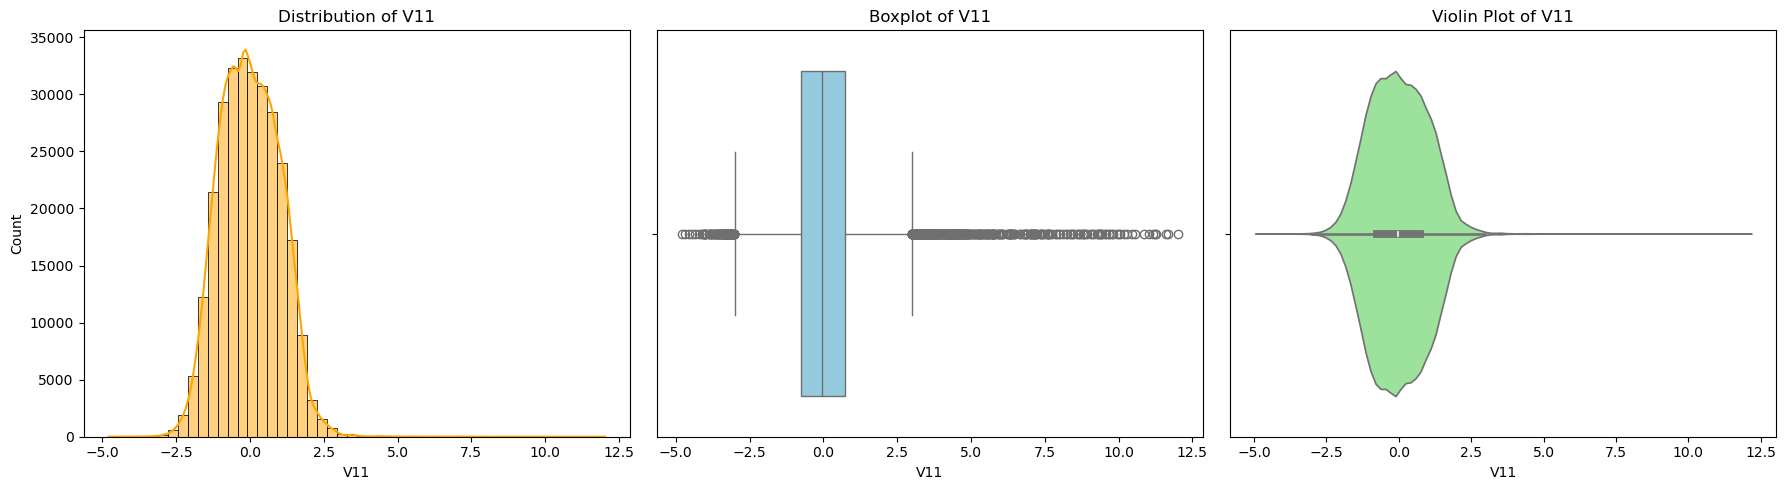

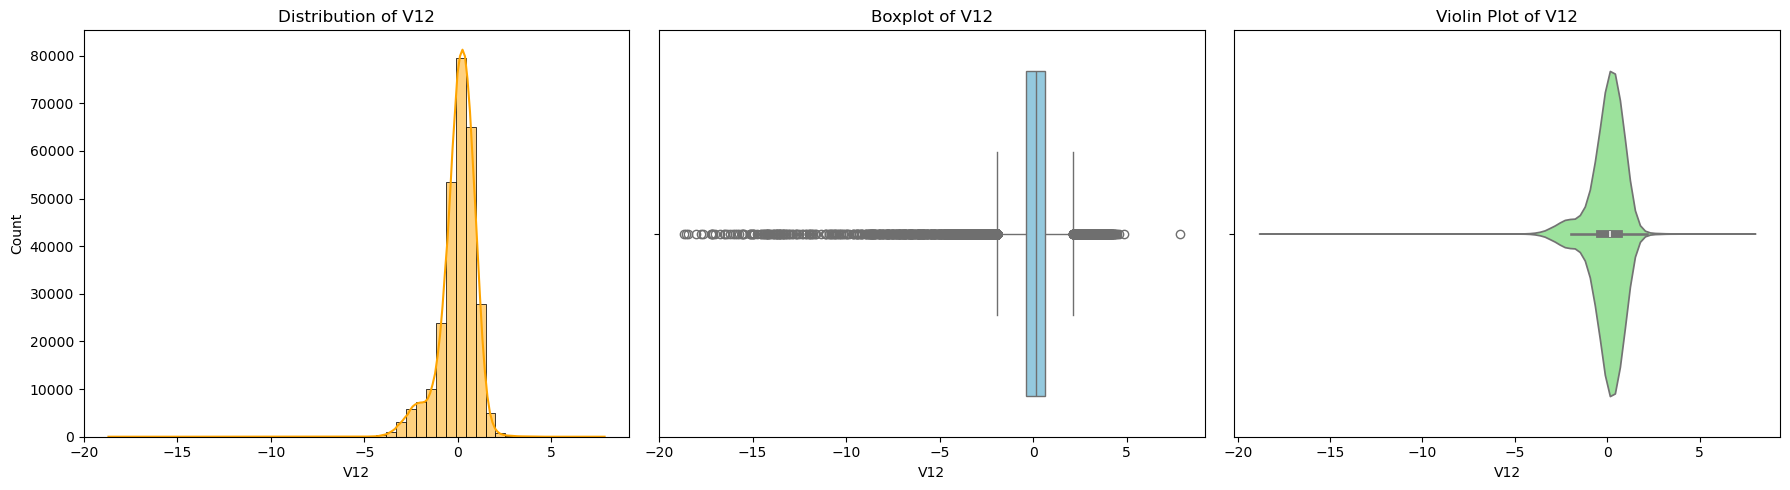

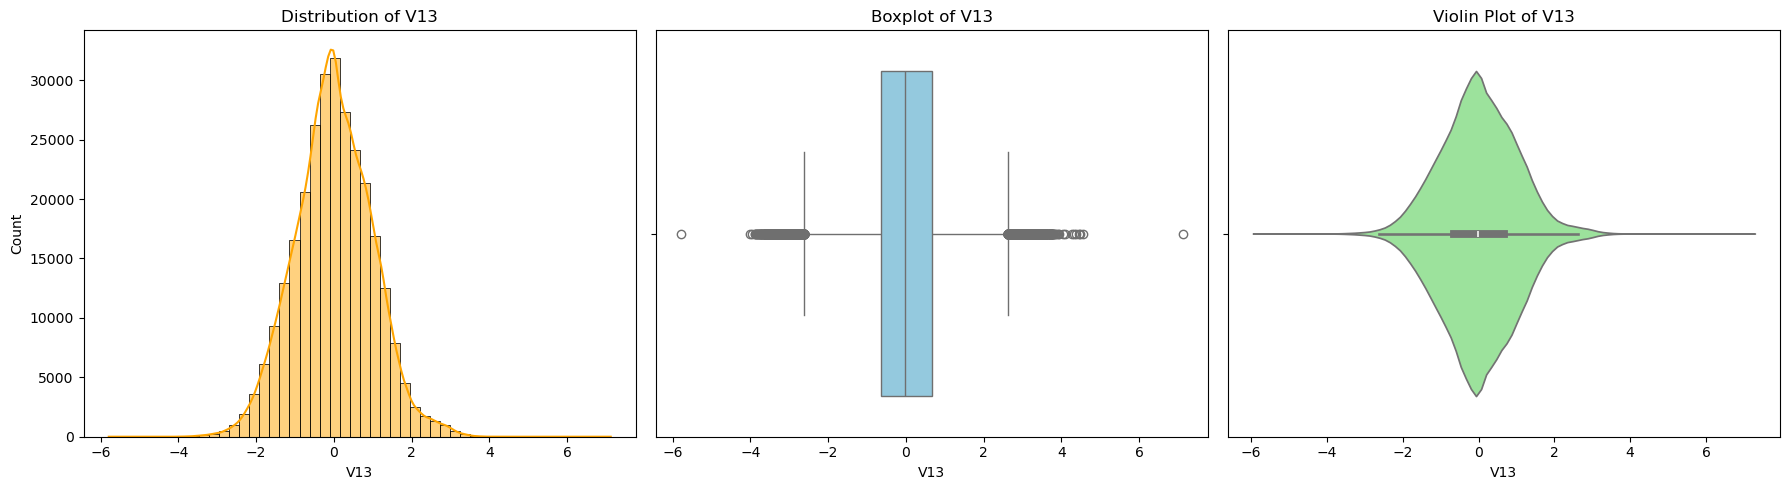

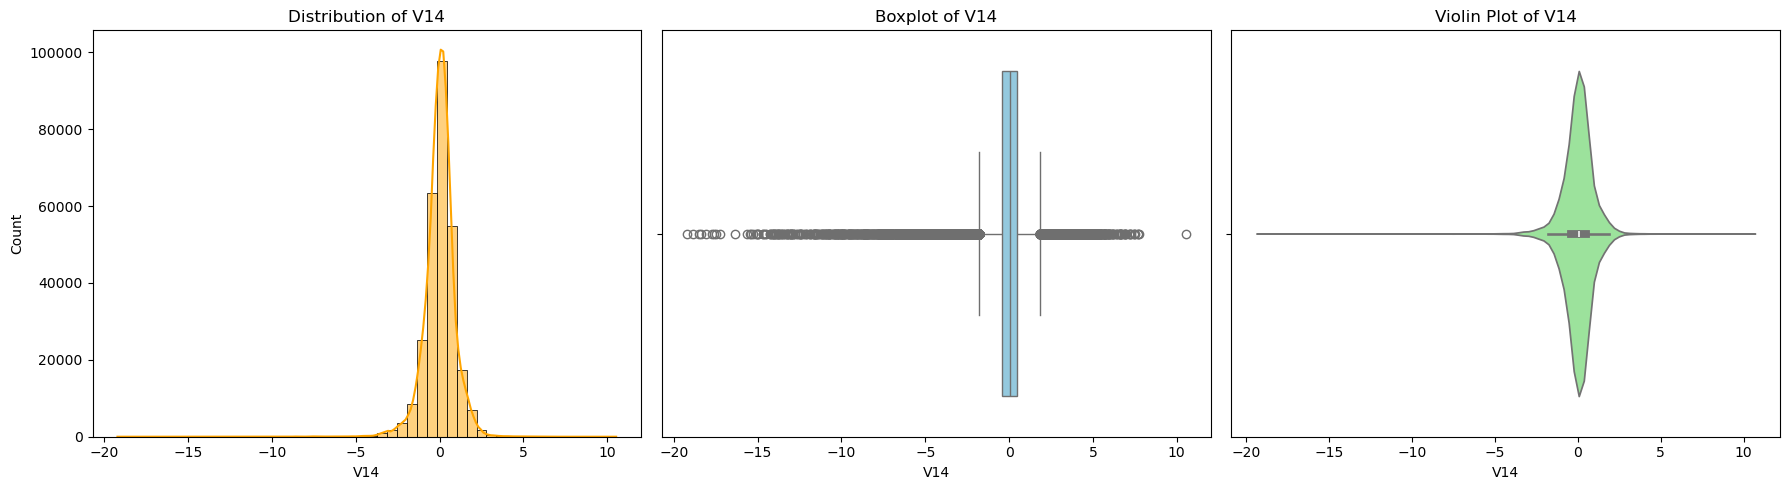

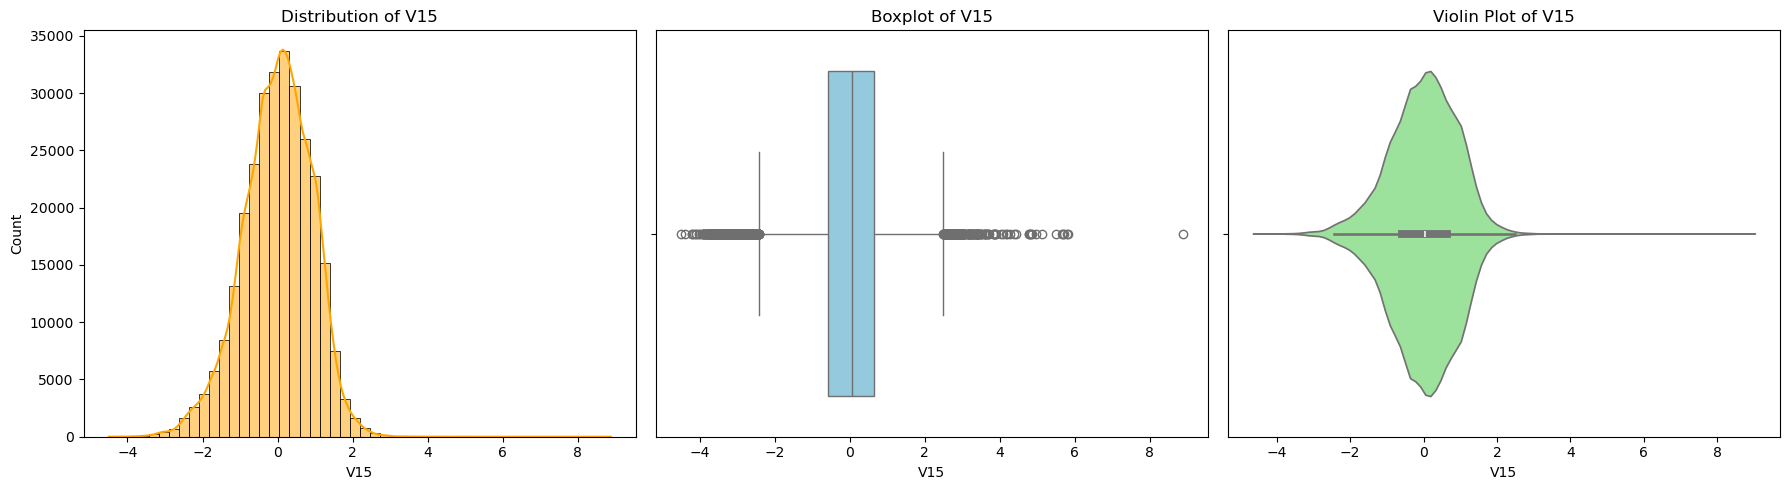

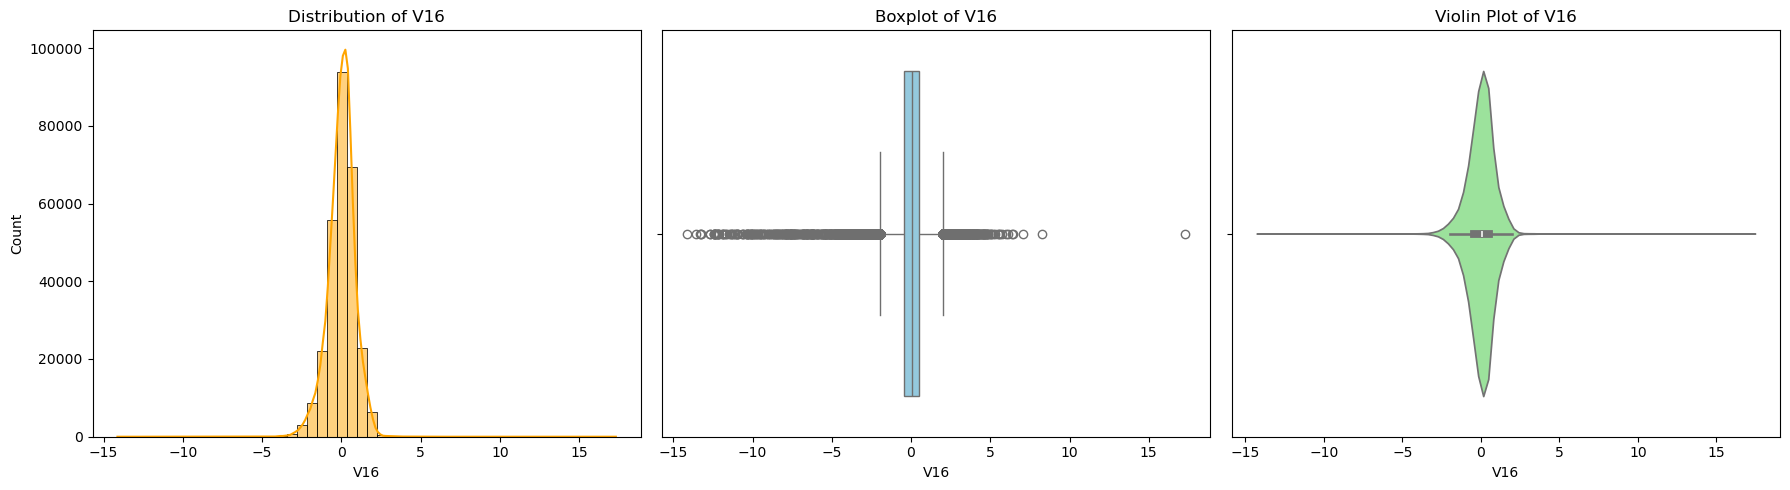

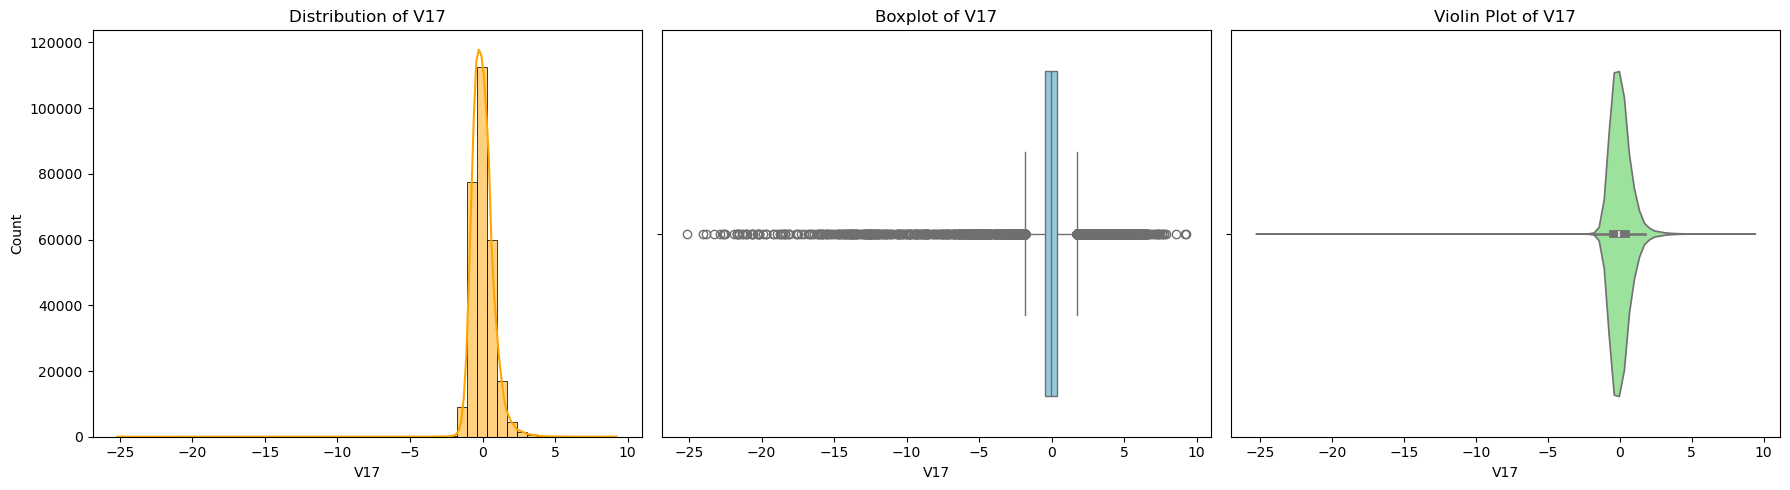

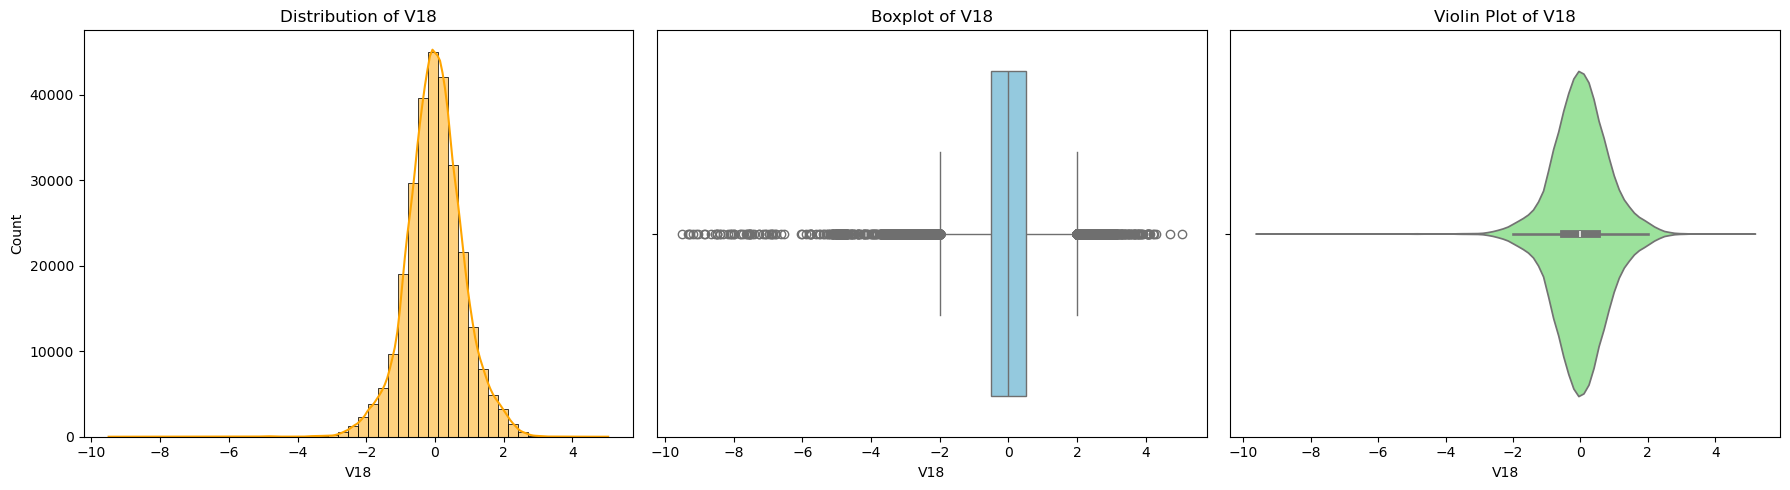

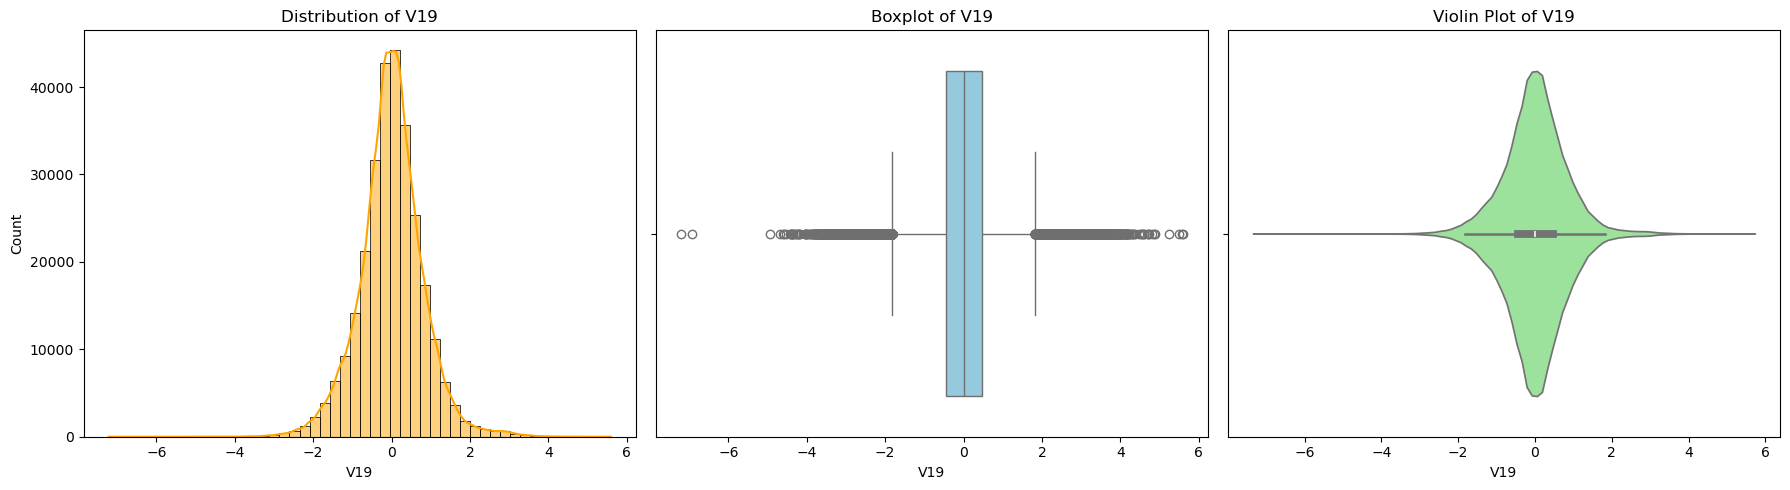

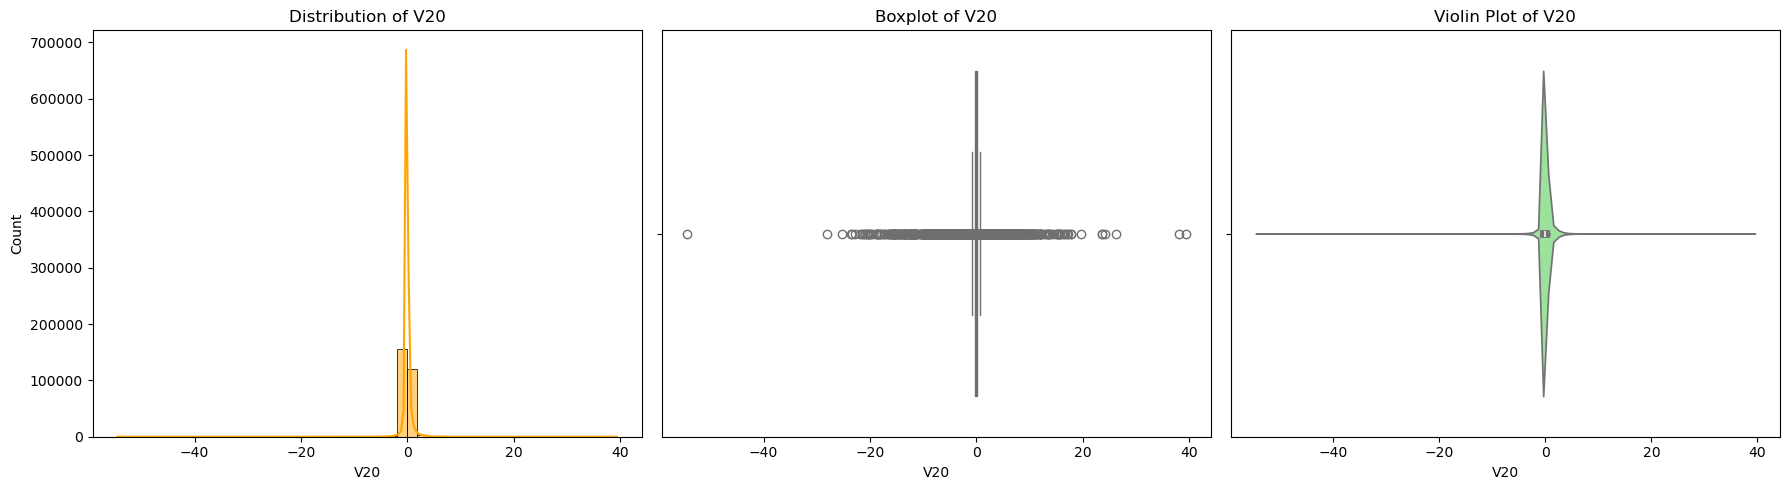

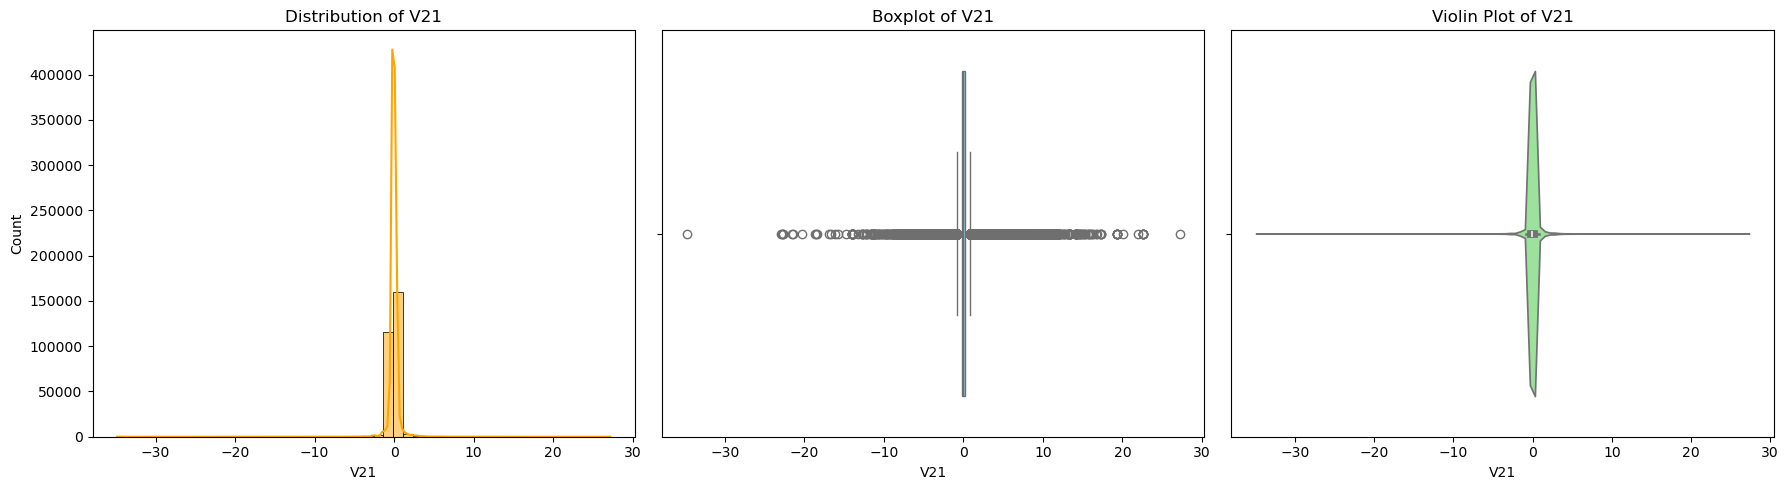

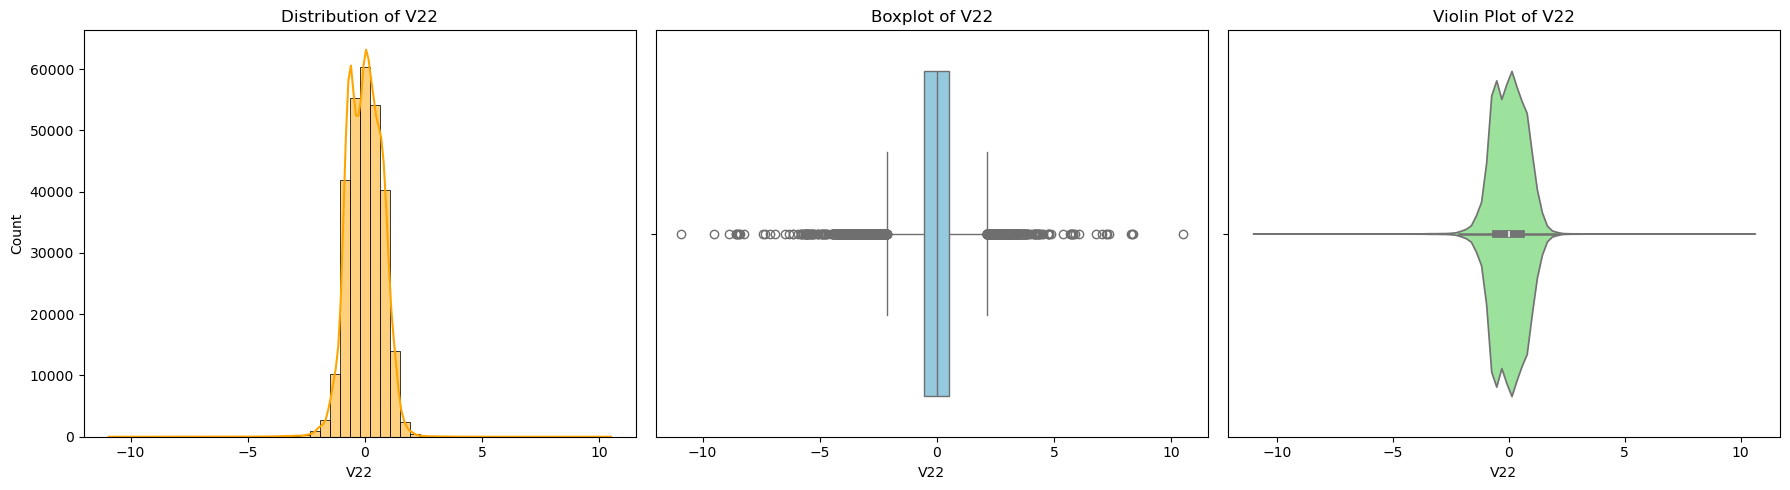

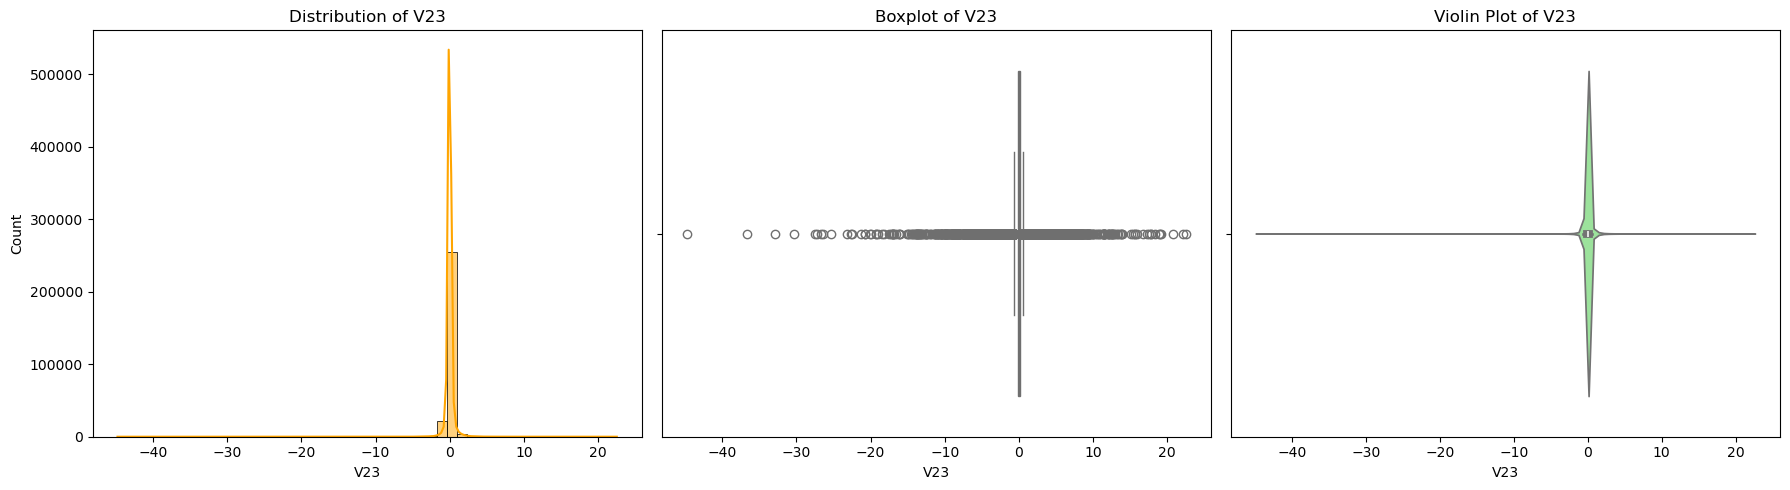

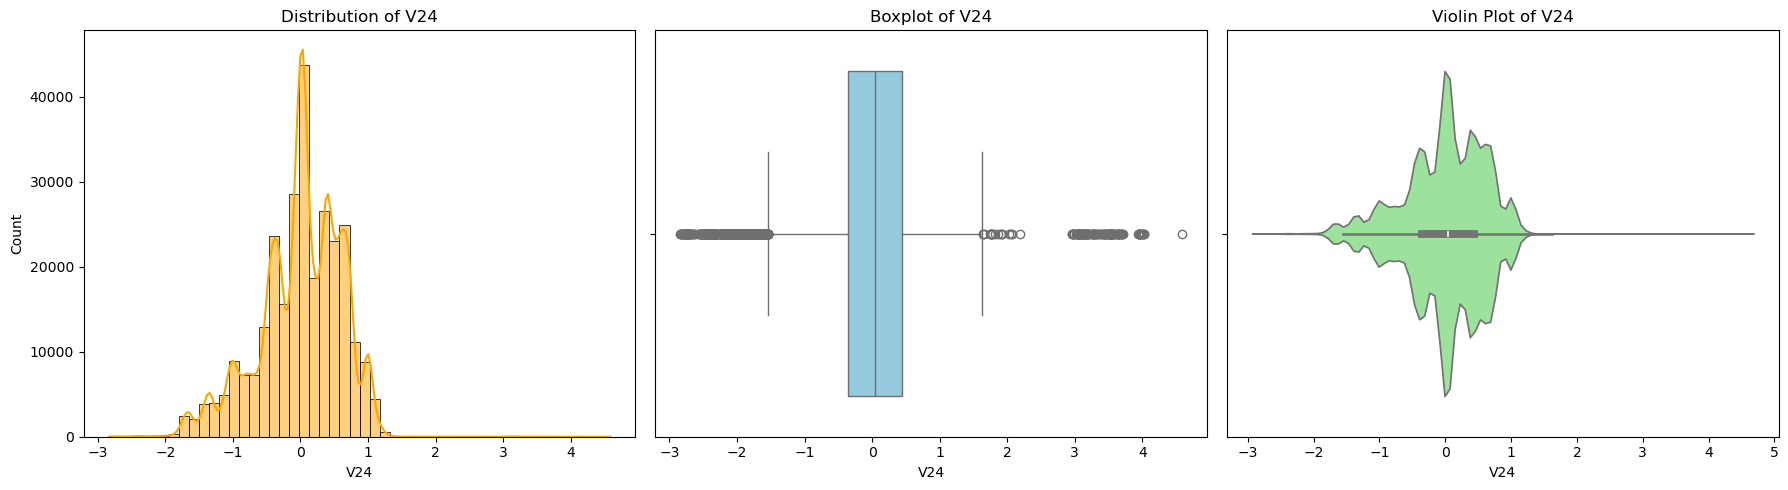

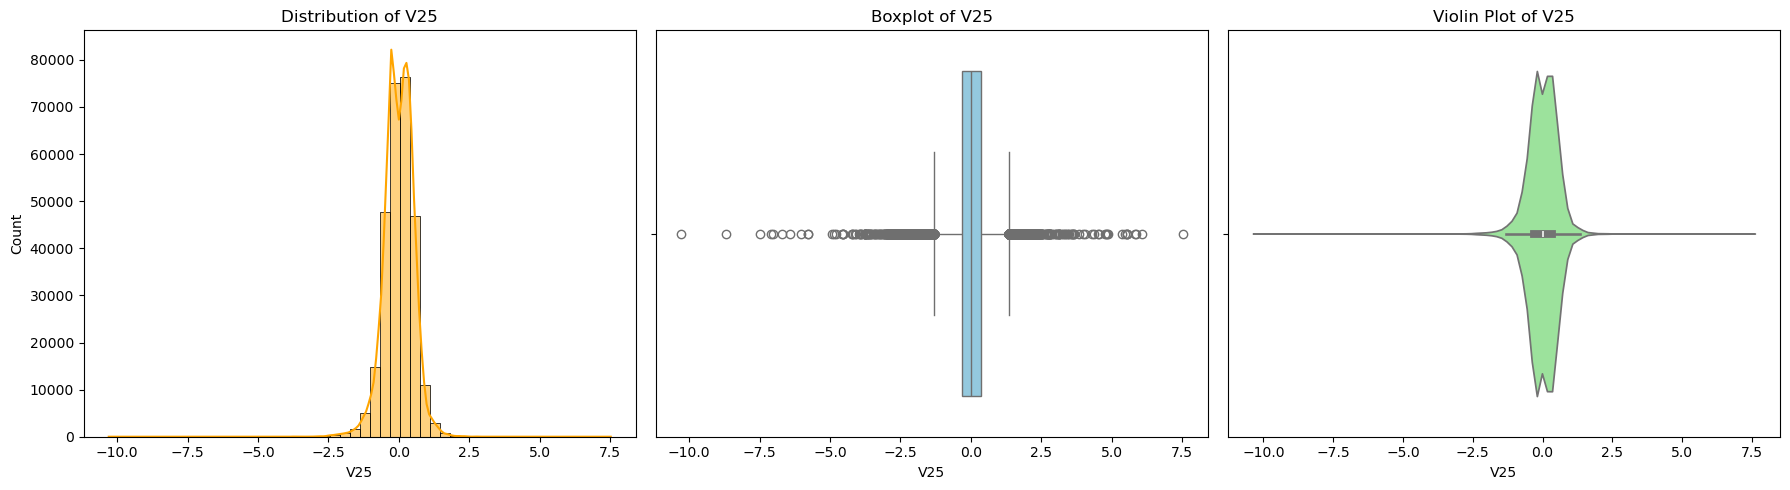

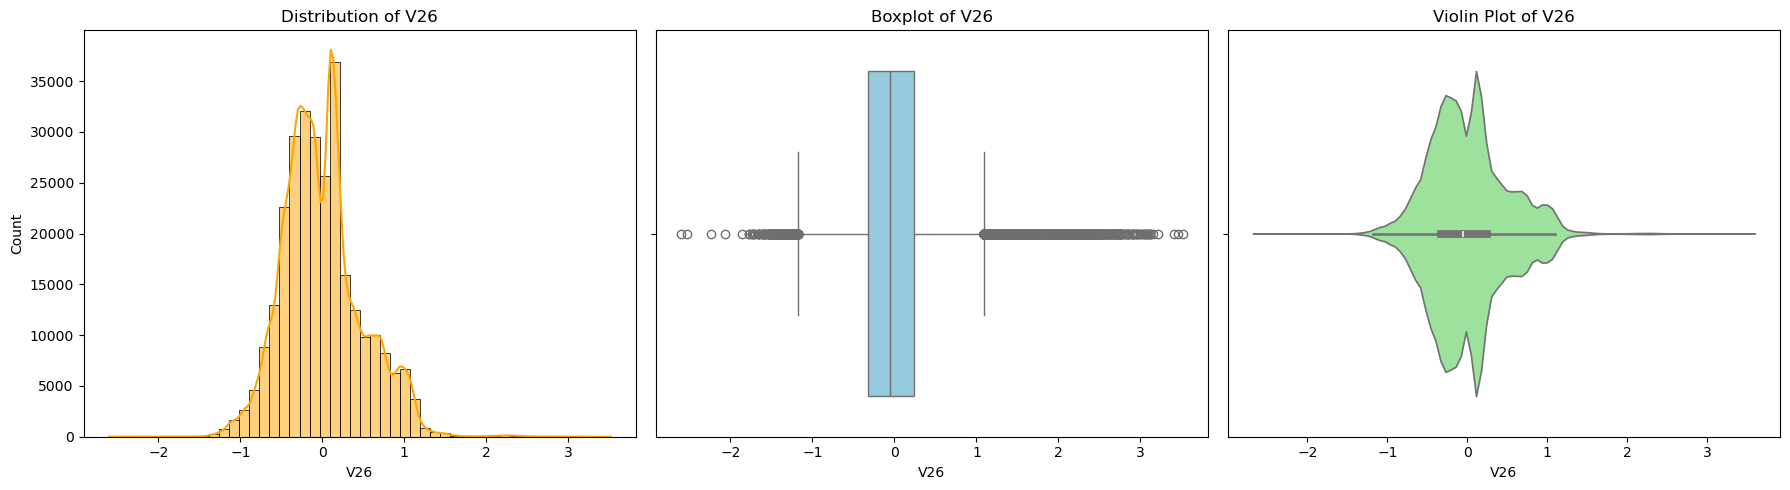

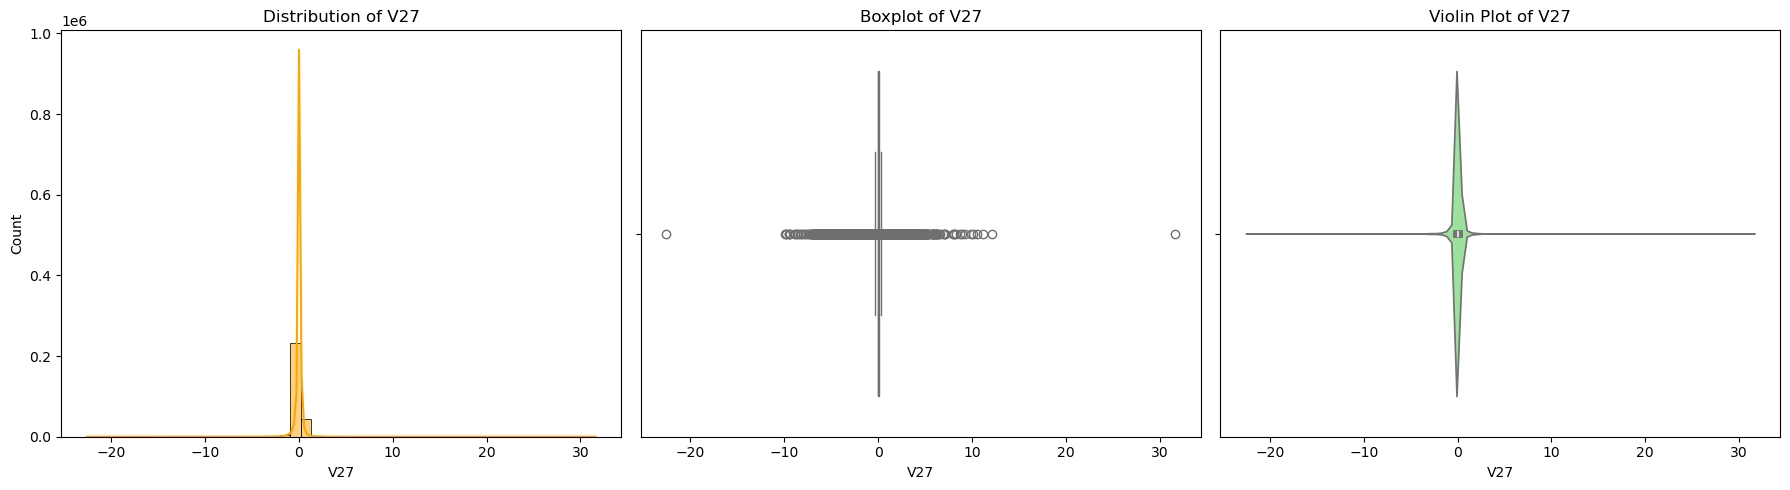

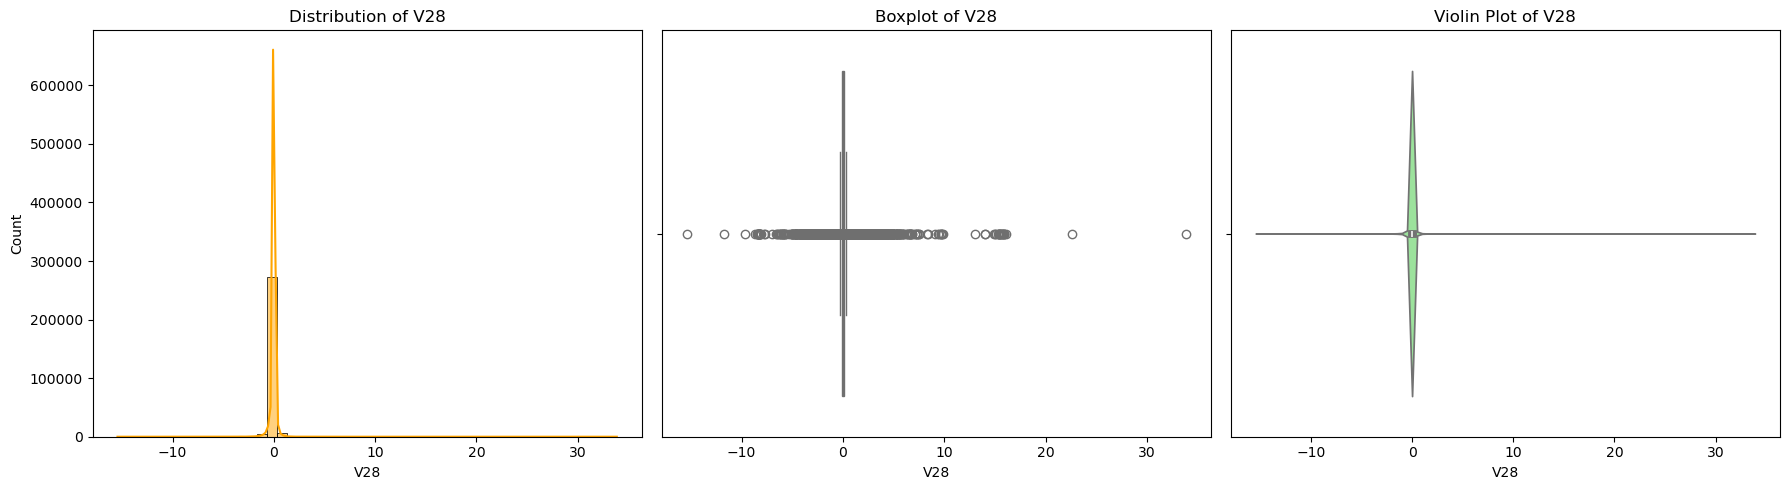

In [27]:
features = [f"V{i}" for i in range(1,29)]

for col in features:
    analyze_feature(df, col)

In [28]:
corr = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, cmap="coolwarm", annot=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'Night (0-6)'

In [ ]:
class_corr = corr["Class"].sort_values(ascending=False)

plt.figure(figsize=(8,12))
sns.barplot(x=class_corr.values, y=class_corr.index, palette="coolwarm",hue=class_corr.values)
plt.title("Correlation of Features with Class")
plt.show()

In [ ]:
# Find top correlated features with Class
class_correlations = df.corr()['Class'].sort_values(ascending=False)
print("Top 10 features correlated with Class:")
print(class_correlations[1:11])

# Plot the top 5 positively and negatively correlated features with Class
top_pos_corr = class_correlations[1:6]
top_neg_corr = class_correlations[-5:]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_pos_corr.index, y=top_pos_corr.values, palette='Pastel1',hue=top_pos_corr.values)
plt.title('Top 5 Positively Correlated Features with Fraud')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(x=top_neg_corr.index, y=top_neg_corr.values, palette='Set3',hue=top_neg_corr.values)
plt.title('Top 5 Negatively Correlated Features with Fraud')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 3D scatter plot of top 3 PCA components
fig = px.scatter_3d(df, x='V11', y='V4', z='V2', color='Class',
                  color_continuous_scale=px.colors.sequential.Viridis,
                  title='3D Visualization of Top 3 Important Features')
fig.update_layout(scene=dict(
    xaxis_title='V11',
    yaxis_title='V14',
    zaxis_title='V2'))
fig.show()

## Split the Data

In [ ]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


## Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Handle imbalance class

In [ ]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [ ]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_res.value_counts())

## Model

### Logistic Regression

In [ ]:
# Train the model
log_reg_model = LogisticRegression(solver='liblinear', random_state=42)
log_reg_model.fit(X_train, y_train)



In [ ]:
# Make predictions
y_pred_log_reg = log_reg_model.predict(X_test)
y_prob_log_reg = log_reg_model.predict_proba(X_test)[:, 1]



In [ ]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_log_reg):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_log_reg):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_log_reg):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_log_reg):.4f}")
print("\nConfusion Matrix:")
# Plot confusion matrix
plt.figure(figsize=(2, 1))
cm = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("\n")

### Random Forest

In [ ]:
# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')
rf_model.fit(X_train, y_train)



In [ ]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]



In [ ]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_rf):.4f}")
print("\nConfusion Matrix:")
# Plot confusion matrix
plt.figure(figsize=(2, 1))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("\n")

In [ ]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

### XGBoost

In [ ]:
# Train the model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1,  eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)



In [ ]:
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]



In [ ]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_xgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_xgb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_xgb):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_xgb):.4f}")
print("\nConfusion Matrix:")
# Plot confusion matrix
plt.figure(figsize=(2, 1))
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('XGBClassifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("\n")

In [ ]:
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

### Isolation Forest

In [ ]:
# Train the model (unsupervised, doesn't need y_train)
# contamination is the proportion of outliers in the data
iso_forest_model = IsolationForest(contamination=0.00172, random_state=42, n_jobs=-1)
iso_forest_model.fit(X_train)



In [ ]:
# Predict on the test set (-1 is outlier/fraud, 1 is normal)
y_pred_iso_forest = iso_forest_model.predict(X_test)



In [ ]:
# Convert predictions to 0 (normal) and 1 (fraud)
y_pred_iso_forest[y_pred_iso_forest == 1] = 0
y_pred_iso_forest[y_pred_iso_forest == -1] = 1



In [ ]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_iso_forest):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_iso_forest):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_iso_forest):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_iso_forest):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_iso_forest):.4f}")
print("\nConfusion Matrix:")
# Plot confusion matrix
plt.figure(figsize=(2, 1))
cm = confusion_matrix(y_test, y_pred_iso_forest)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Isolation Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Adaboost

In [ ]:
# Initialize the AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42, learning_rate=0.1, algorithm='SAMME')
ada_model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred_ada = ada_model.predict(X_test)
y_pred_proba_ada = ada_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_ada):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_ada):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_ada):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_ada):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_ada):.4f}")
print("\nConfusion Matrix:")
# Plot confusion matrix
plt.figure(figsize=(2, 1))
cm = confusion_matrix(y_test, y_pred_ada)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Adaboost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("\n")

## CatBoostClassifier

In [ ]:
# Initialize the CatBoost model
cat_model = CatBoostClassifier(iterations=100, learning_rate=0.1, random_state=42, 
                               class_weights=[1, 99], verbose=0)
cat_model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred_cat = cat_model.predict(X_test)
y_pred_proba_cat = cat_model.predict_proba(X_test)[:, 1]


In [ ]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_cat):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_cat):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_cat):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_cat):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_cat):.4f}")
print("\nConfusion Matrix:")
# Plot confusion matrix
plt.figure(figsize=(2, 1))
cm = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('CatBoost Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("\n")

## LightGBM

In [ ]:
# Initialize the LightGBM model
lgbm_model = LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42, 
                           class_weight='balanced', n_jobs=-1)
lgbm_model.fit(X_train, y_train)


In [ ]:
# Make predictions
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_proba_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgbm):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lgbm):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lgbm):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lgbm):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_lgbm):.4f}")
print("\nConfusion Matrix:")
# Plot confusion matrix
plt.figure(figsize=(2, 1))
cm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('LGBM Classifier - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("\n")

## Hyperpramter Tuning for Xgboost


In [ ]:
xgb = XGBClassifier(eval_metric='logloss')

# Define parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

In [ ]:
random_search = RandomizedSearchCV(
    xgb, param_distributions=param_dist,
    n_iter=30, scoring='roc_auc', cv=3, verbose=2, n_jobs=-1, random_state=42
)

In [ ]:
random_search.fit(X_train, y_train)


In [ ]:
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

In [ ]:
best_xgb = XGBClassifier(
    subsample=1.0,
    reg_lambda=1,
    reg_alpha=0.1,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    gamma=0.1,
    colsample_bytree=0.6,
    random_state=42,
    eval_metric='logloss'
)

best_xgb.fit(X_train, y_train)


In [ ]:
# test
y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:, 1]

In [ ]:
#evaluate
print("XGBoost (Tuned) Classification Report:\n")
print(classification_report(y_test, y_pred))

In [ ]:
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

## Comparison

In [ ]:
models = {
    "Logistic Regression": (y_test, y_pred_log_reg, y_prob_log_reg),
    "Random Forest": (y_test, y_pred_rf, y_prob_rf),
    "XGBoost": (y_test, y_pred_xgb, y_prob_xgb),
    "IsolationForest": (y_test, y_pred_iso_forest,None),
    "XGBoost Tuned": (y_test, y_pred, y_prob),
    "AdaBoost":(y_test, y_pred_ada, y_pred_proba_ada),
    "CatBoost":(y_test, y_pred_cat, y_pred_proba_cat),
    "LGBM":(y_test, y_pred_lgbm, y_pred_proba_lgbm)
}

results = []

for name, (yt, yp, ypr) in models.items():
    report = classification_report(yt, yp, output_dict=True)
    if ypr is not None:
        auc = roc_auc_score(yt, ypr)
    else:
        auc = np.nan  # Use NaN (Not a Number) if ROC-AUC can't be calculated

   
    acc = accuracy_score(yt, yp)
    
    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-score": report["1"]["f1-score"],
        "ROC-AUC": auc
    })

df_results = pd.DataFrame(results)
print(df_results)

metrics = ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]

plt.figure(figsize=(12, 6))
df_melted = df_results.melt(id_vars="Model", value_vars=metrics, 
                            var_name="Metric", value_name="Score")
sns.barplot(data=df_melted, x="Metric", y="Score", hue="Model")
plt.title("Comparison of Models Performance")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()

# -------------------------------
# 3- رسم ROC Curves
# -------------------------------
plt.figure(figsize=(8, 6))

for name, (yt, yp, ypr) in models.items():
    if ypr is not None:
        fpr, tpr, _ = roc_curve(yt, ypr)
        auc = roc_auc_score(yt, ypr)
        plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")
    else:
        # Skip plotting for models that don't provide probabilities
        print(f"Skipping ROC plot for {name} as it does not provide probability scores.")

    # fpr, tpr, _ = roc_curve(yt, ypr)
    # auc = roc_auc_score(yt, ypr)
    # plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")  # خط التوزيع العشوائي
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()

## Sampling comparison¶


In [ ]:
def thr_for_precision(y_true, y_score, target_p=0.90):
    ps, rs, ths = precision_recall_curve(y_true, y_score)
    hits = np.where(ps[:-1] >= target_p)[0]
    if hits.size:
        i = hits[0]
        return float(ths[i]), float(ps[i]), float(rs[i])
    i = np.argmax(0.5*ps[:-1] + 0.5*rs[:-1])  
    return float(ths[i]), float(ps[i]), float(rs[i])


def evaluate_block(y_true, y_score, thr=0.5):
    y_pred = (y_score >= thr).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=[0,1]).ravel()
    return dict(
        threshold=float(thr),
        precision=precision_score(y_true, y_pred, zero_division=0),
        recall=recall_score(y_true, y_pred),
        f1=f1_score(y_true, y_pred, zero_division=0),
        roc_auc=roc_auc_score(y_true, y_score),
        auprc=average_precision_score(y_true, y_score),
        brier=brier_score_loss(y_true, y_score),
        tp=int(tp), fp=int(fp), fn=int(fn), tn=int(tn)
    )


samplers = {
    "None": None,
    "Under": RandomUnderSampler(random_state=42),
    "SMOTE": SMOTE(random_state=42),
    "SMOTE+Tomek": SMOTETomek(random_state=42),
}

sample_results = []

for name, sampler in samplers.items():
    steps = []
    if sampler is not None:
        steps.append(("sampler", sampler))
    steps.extend([
        ("scaler", StandardScaler(with_mean=True)),
        ("clf", LogisticRegression(max_iter=2000, class_weight=None, random_state=42))
    ])

    pipe = ImbPipeline(steps=steps)
    pipe.fit(X_train, y_train)

    val_prob  = pipe.predict_proba(X_val)[:, 1]
    test_prob = pipe.predict_proba(X_test)[:, 1]

    thr90, _, _ = thr_for_precision(y_val, val_prob, 0.90)

    sample_results.append({
        "sampler": name,
        "VAL_AUPRC":  average_precision_score(y_val,  val_prob),
        "TEST_AUPRC": average_precision_score(y_test, test_prob),
        "TEST_ROC_AUC": roc_auc_score(y_test, test_prob),
        "TEST_Recall@P90": evaluate_block(y_test, test_prob, thr90)["recall"],
    })

sample_df = pd.DataFrame(sample_results).sort_values("TEST_AUPRC", ascending=False)
display(sample_df.round(4))
